dat['mouse_name']: mouse name

dat['date_exp']: when a session was performed

dat['spks']: neurons by trials by time bins.

dat['brain_area']: brain area for each neuron recorded.

dat['contrast_right']: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.

dat['contrast_left']: contrast level for left stimulus.

dat['gocue']: when the go cue sound was played.

dat['response_times']: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.

dat['response']: which side the response was (-1, 0, 1). When the right-side stimulus had higher contrast, the correct choice was -1. 0 is a no go response.

dat['feedback_time']: when feedback was provided.

dat['feedback_type']: if the feedback was positive (+1, reward) or negative (-1, white noise burst).

dat['wheel']: exact position of the wheel that the mice uses to make a response, binned at 10ms.

dat['pupil']: pupil area (noisy, because pupil is very small) + pupil horizontal and vertical position.

dat['lfp']: recording of the local field potential in each brain area from this experiment, binned at 10ms.

dat['brain_area_lfp']: brain area names for the LFP channels.

dat['trough_to_peak']: measures the width of the action potential waveform for each neuron. Widths <=10 samples are "putative fast spiking neurons".

dat['waveform_w']: temporal components of spike waveforms. w@u reconstructs the time by channels action potential shape.

dat['waveform_u]: spatial components of spike waveforms.

dat['%X%_passive']: same as above for X = {spks, lfp, pupil, wheel, contrast_left, contrast_right} but for passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from functions.plotting import *
from functions.filtering import *

from scipy.ndimage import gaussian_filter1d

In [2]:
# load data from steinmetz dir
alldat = np.load('../steinmetz/steinmetz_part0.npz', allow_pickle=True)['dat']
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part1.npz', allow_pickle=True)['dat']))
alldat = np.hstack((alldat, np.load('../steinmetz/steinmetz_part2.npz', allow_pickle=True)['dat']))

In [3]:
cr_top10 = ["ZI", "APN", "MRN", "SCm", "PO", "LD", "SNr", "SSp", "MOp", "MOs"]
cr_others = ["SCs", "MG", "VPM", "VPL", "MD","CP", "PL", "ACA", "RSP", "VISam"]

In [4]:
# get neurons count for all regions
all_rs = np.hstack([cr_top10, cr_others])
neuron_count = []
for region in all_rs:
    region_neurons = []
    for dat in alldat:
        neurons = dat['brain_area'] == region
        neurons_spks = dat['spks'][neurons]
        neurons_count = neurons_spks.shape[0]
        total_neurons_count = dat['spks'].shape[0]
        trials_count = dat['spks'].shape[1]
#         print(f"{region} neurons: {neurons_count}")
#         print(f"trials: {trials_count}")
        region_neurons.append(total_neurons_count)
    neuron_count.append(np.asarray(region_neurons))
neuron_count = np.asarray(neuron_count)

In [5]:
sorted(list(zip(all_rs, neuron_count.sum(0))))

[('ACA', 21780),
 ('APN', 21400),
 ('CP', 9480),
 ('LD', 23380),
 ('MD', 14860),
 ('MG', 13960),
 ('MOp', 15760),
 ('MOs', 23440),
 ('MRN', 12380),
 ('PL', 11300),
 ('PO', 21540),
 ('RSP', 12120),
 ('SCm', 35380),
 ('SCs', 17140),
 ('SNr', 11680),
 ('SSp', 23120),
 ('VISam', 17980),
 ('VPL', 15120),
 ('VPM', 19660),
 ('ZI', 14680)]

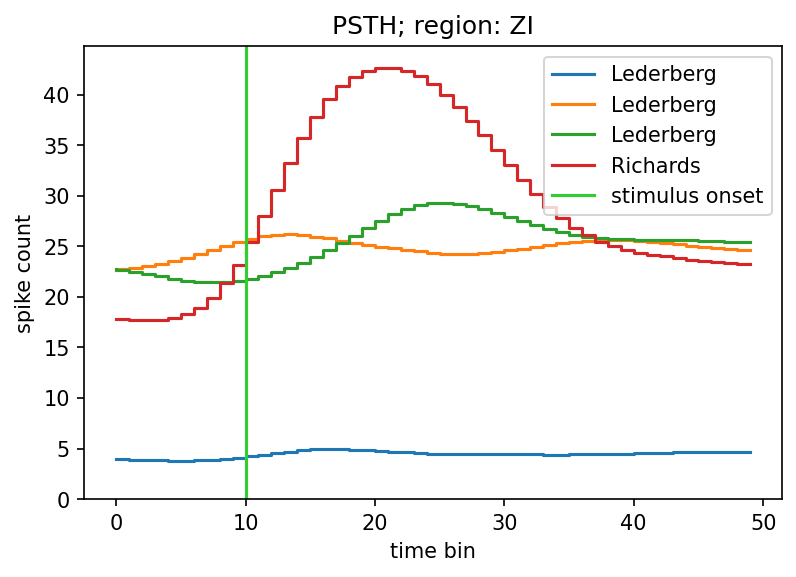

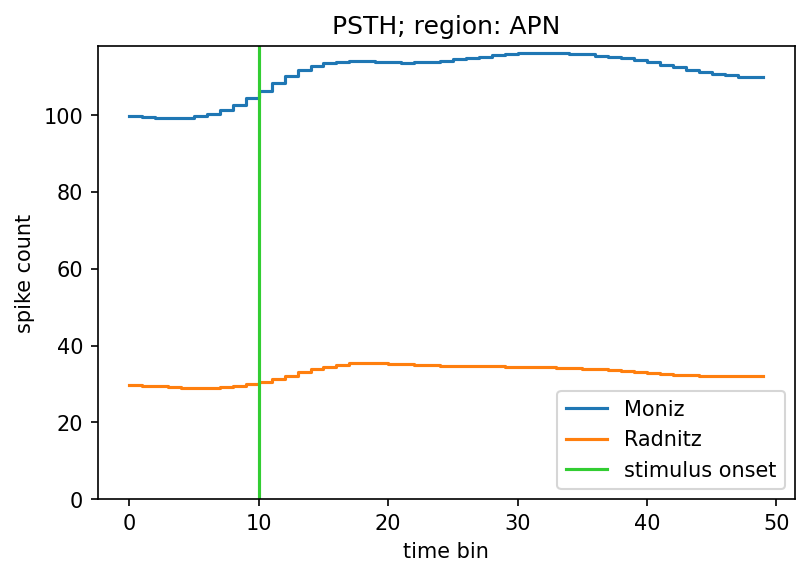

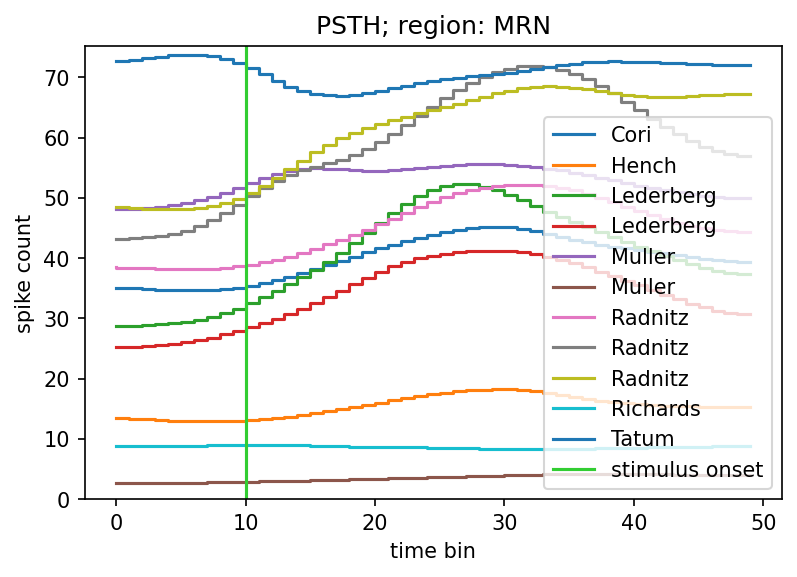

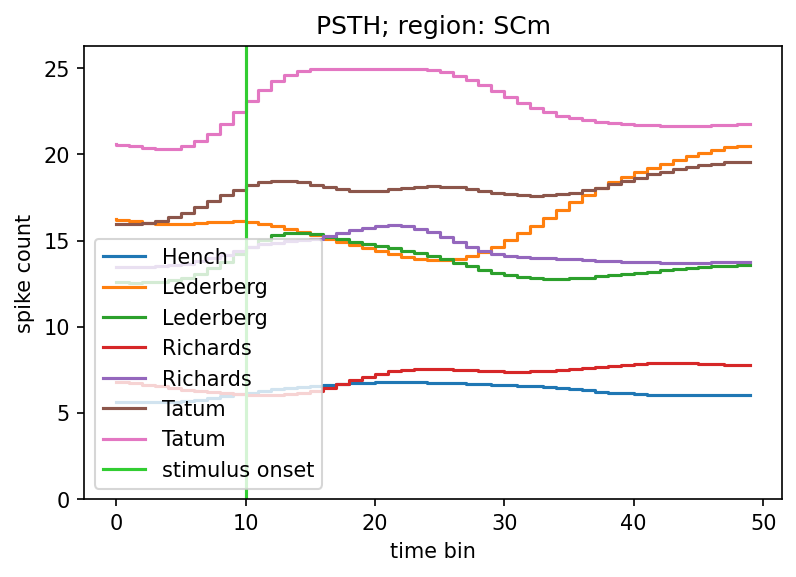

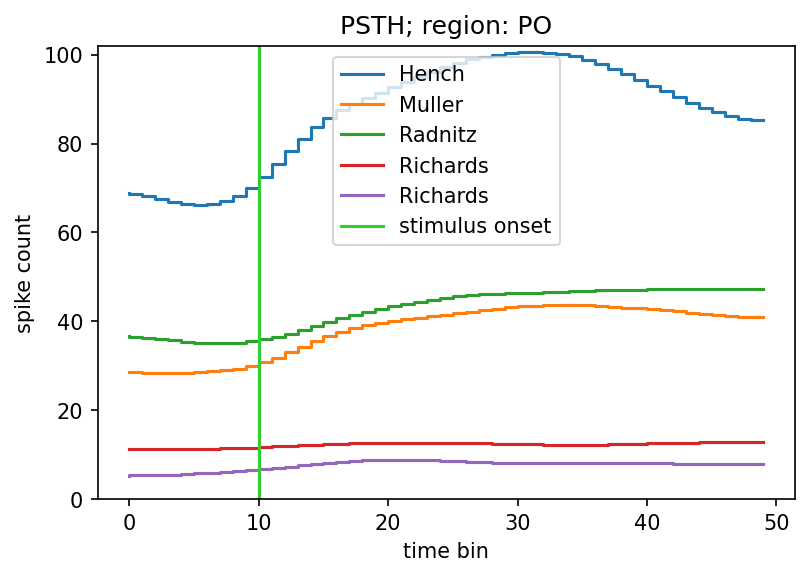

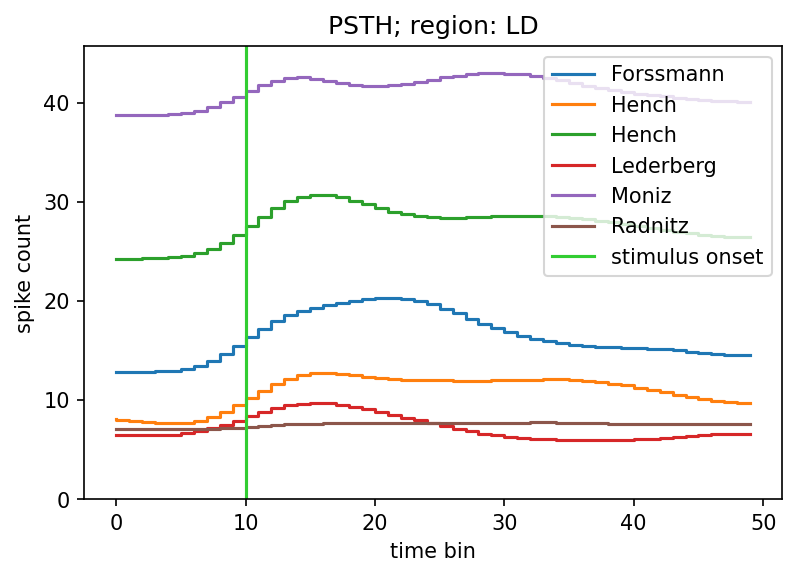

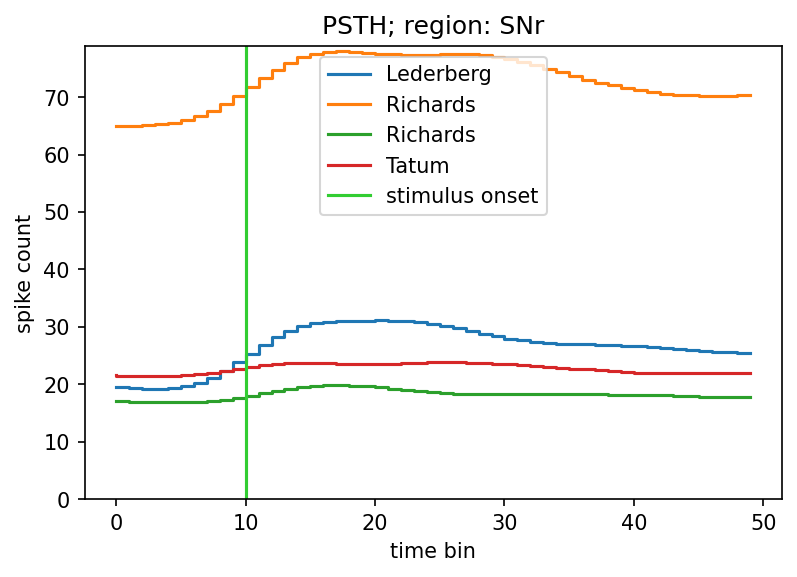

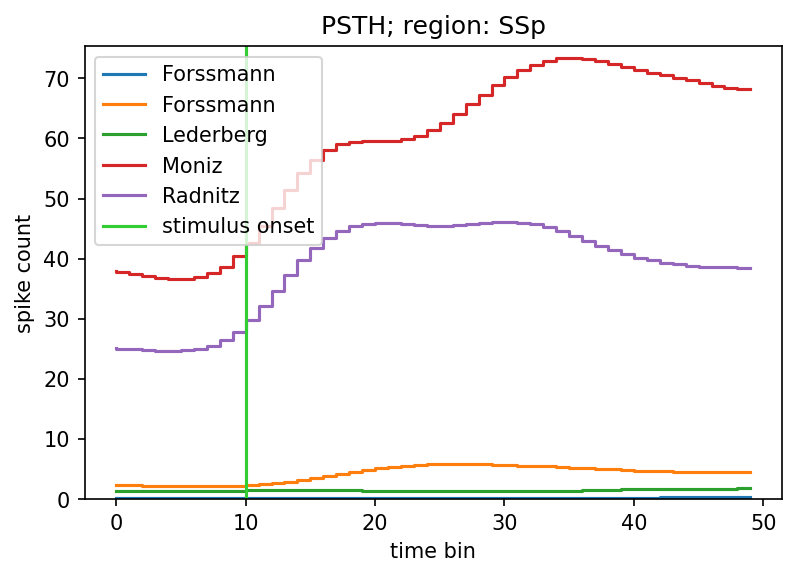

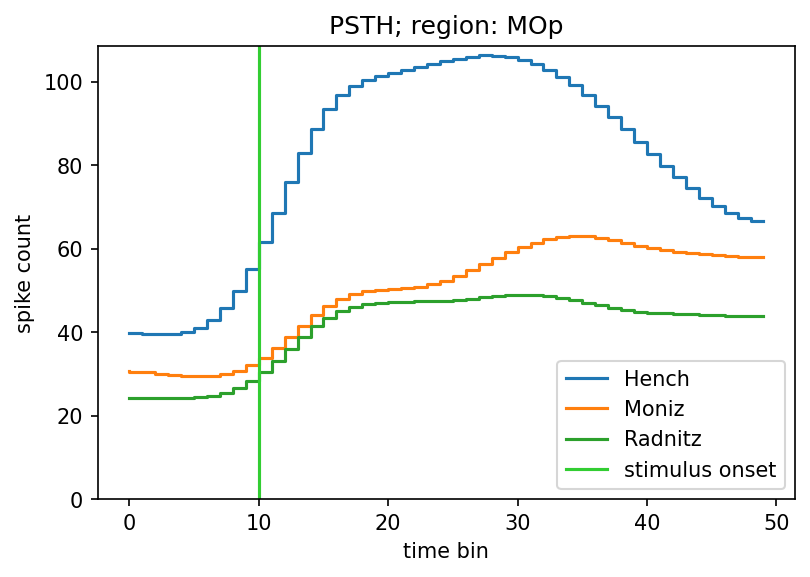

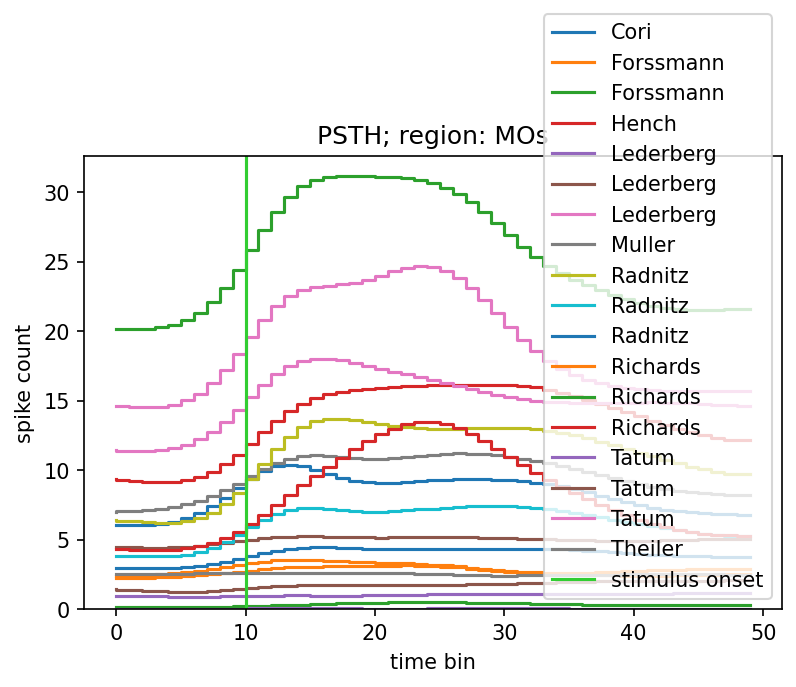

In [6]:
for region in cr_top10:
    psth_combined(alldat, region, timebin_size=5)

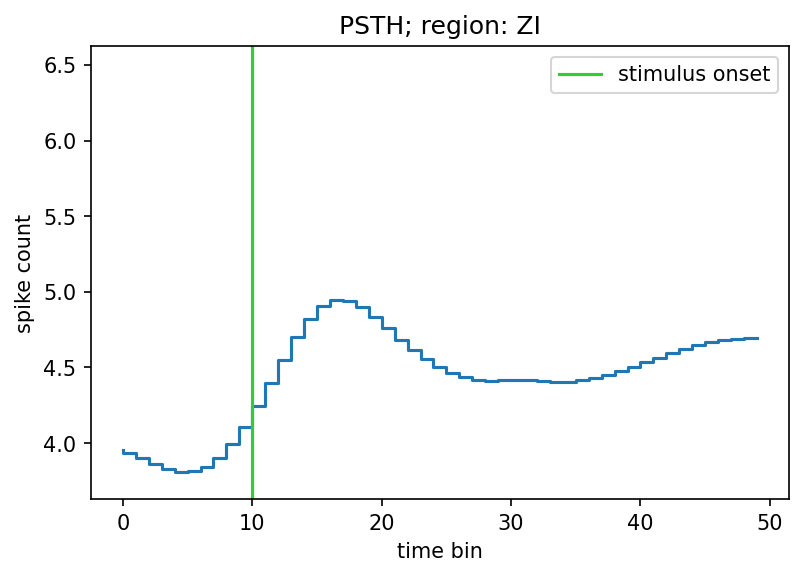

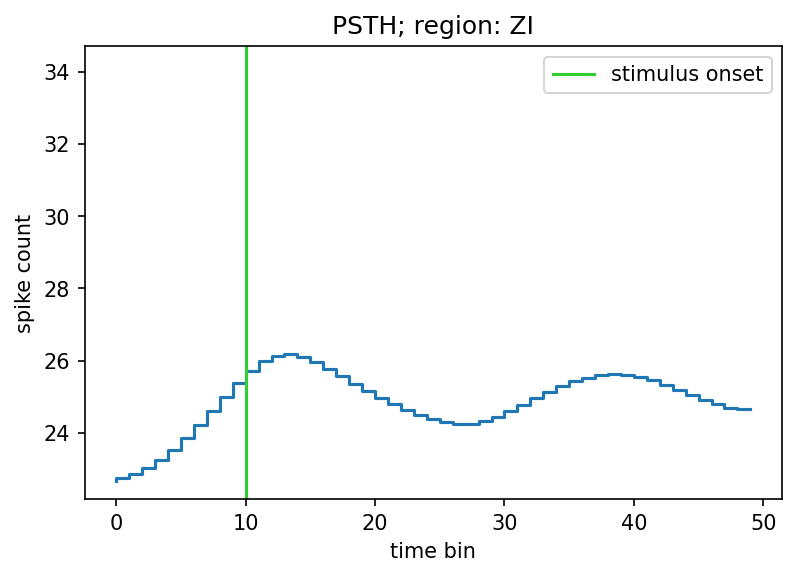

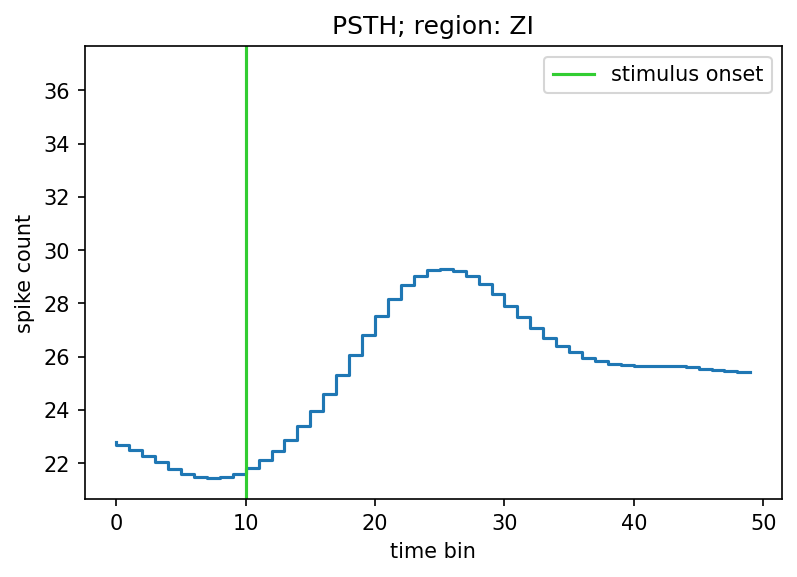

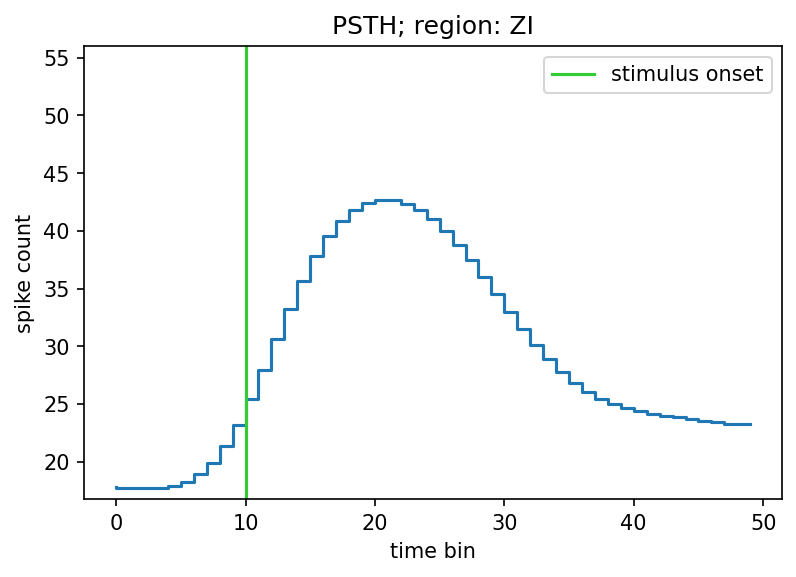

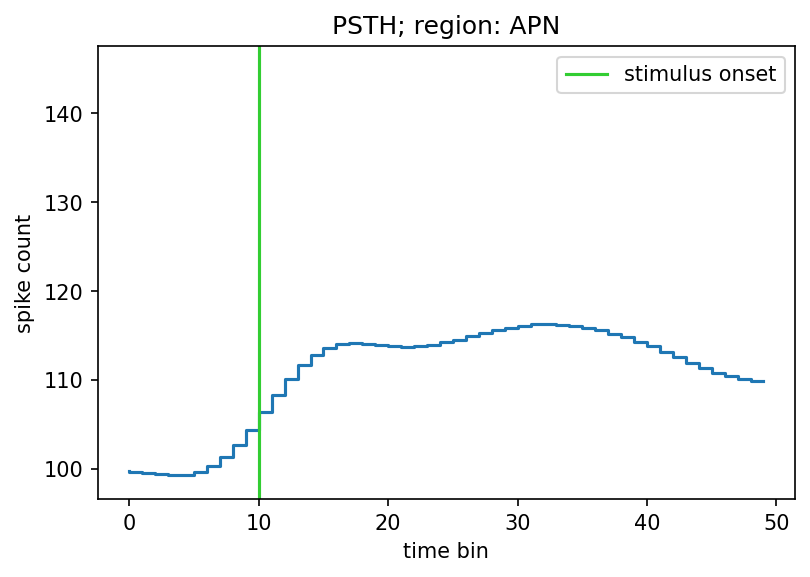

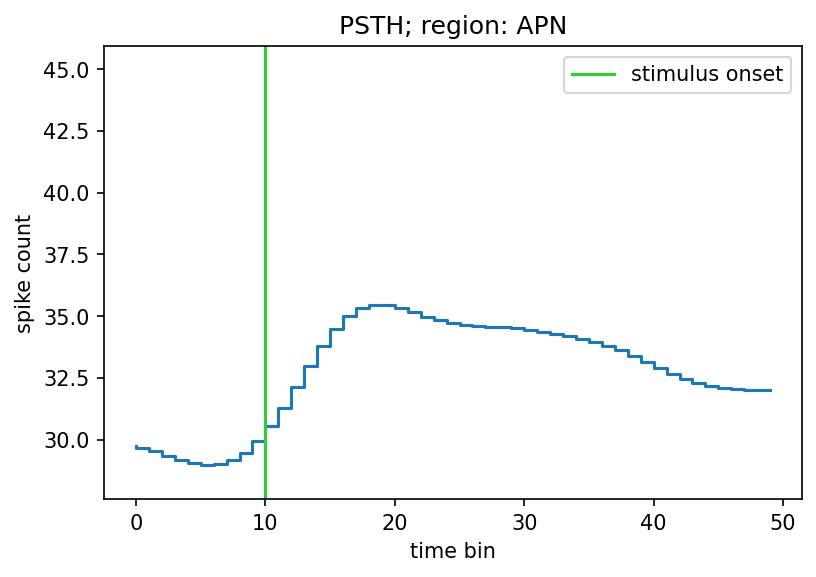

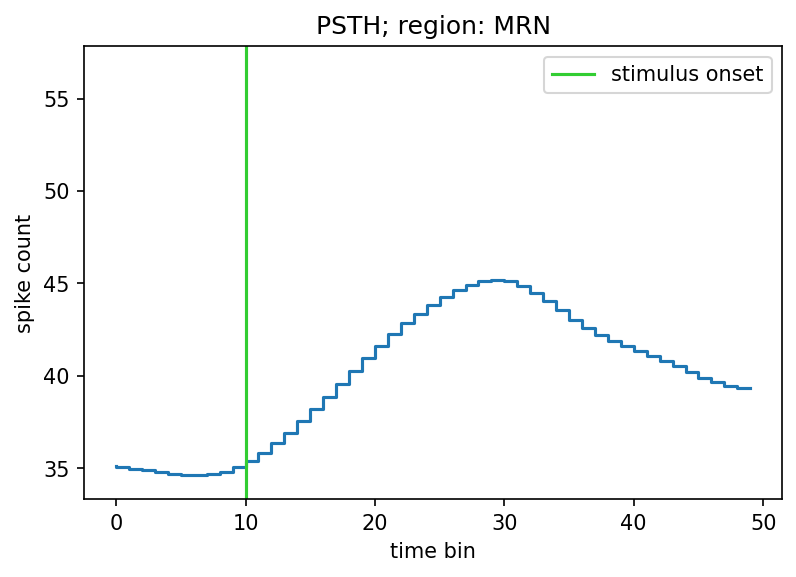

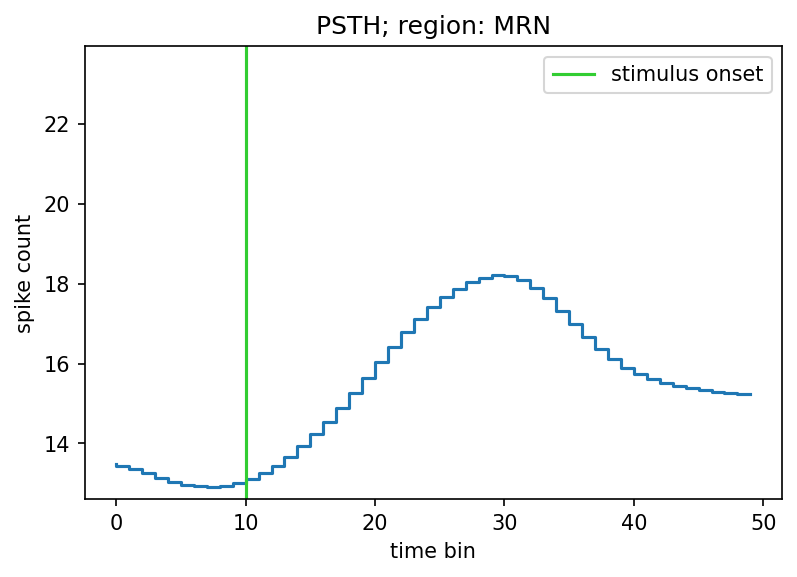

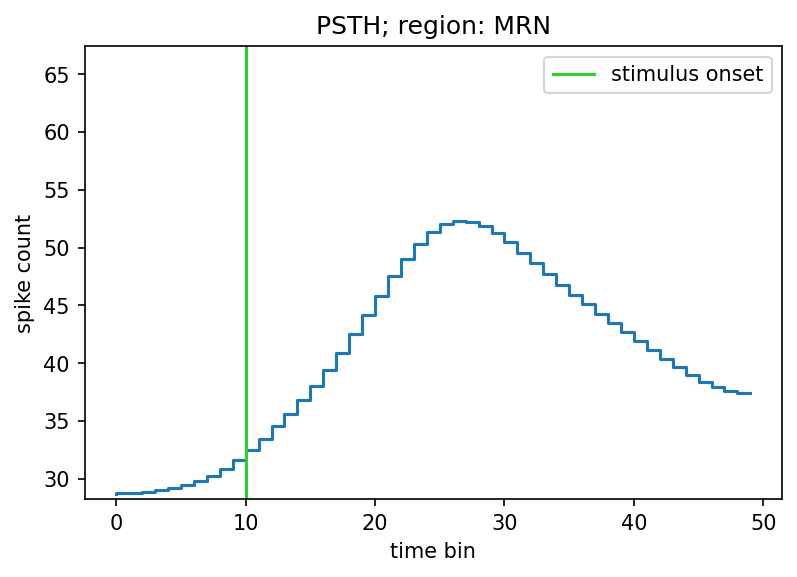

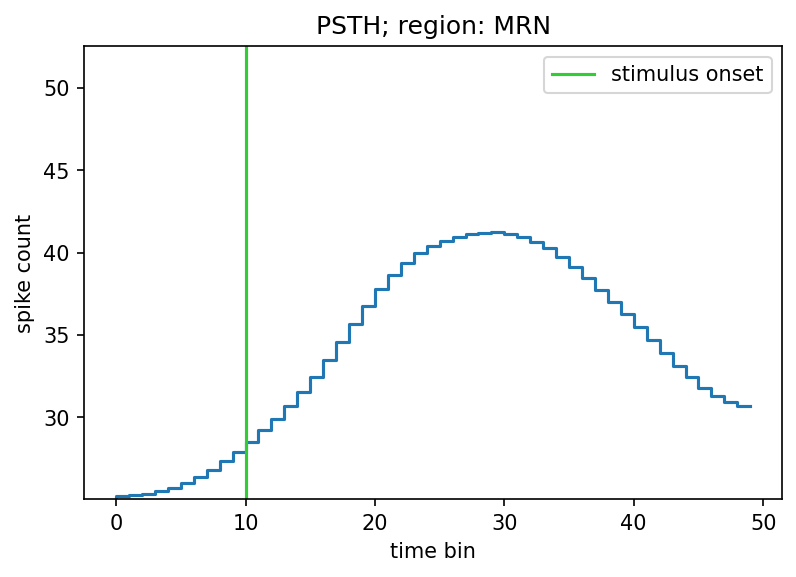

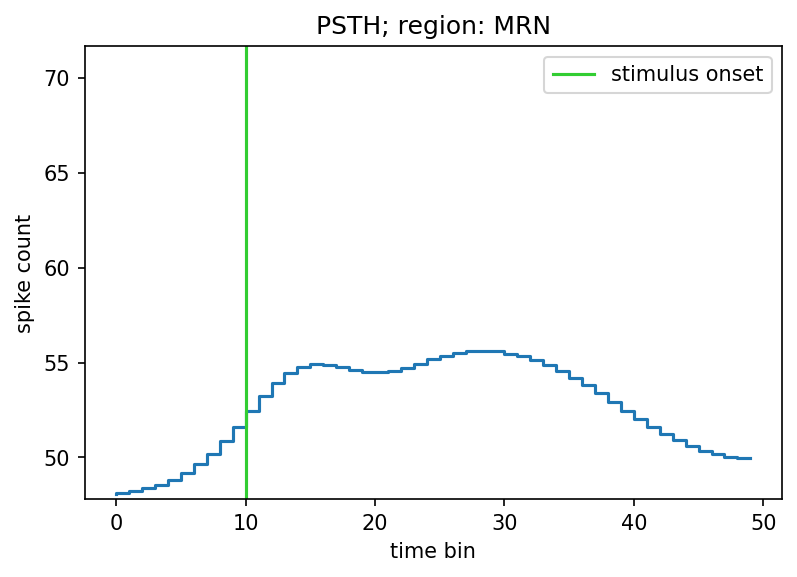

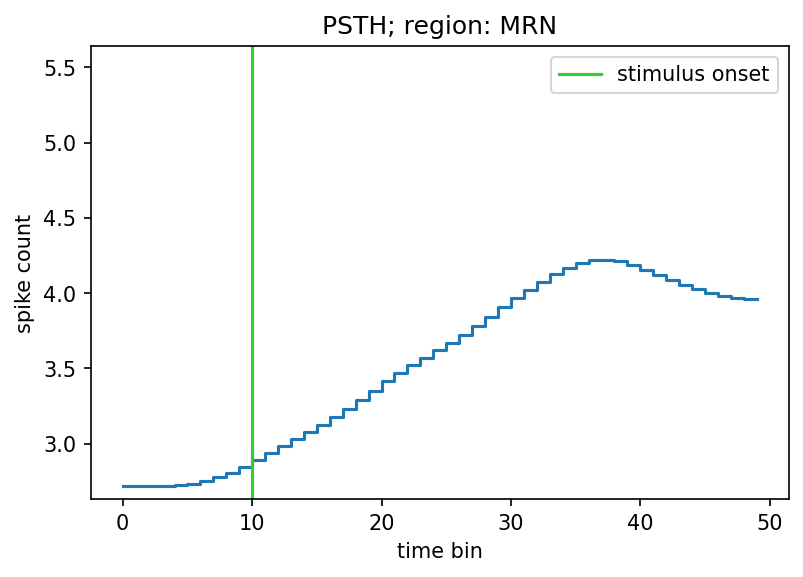

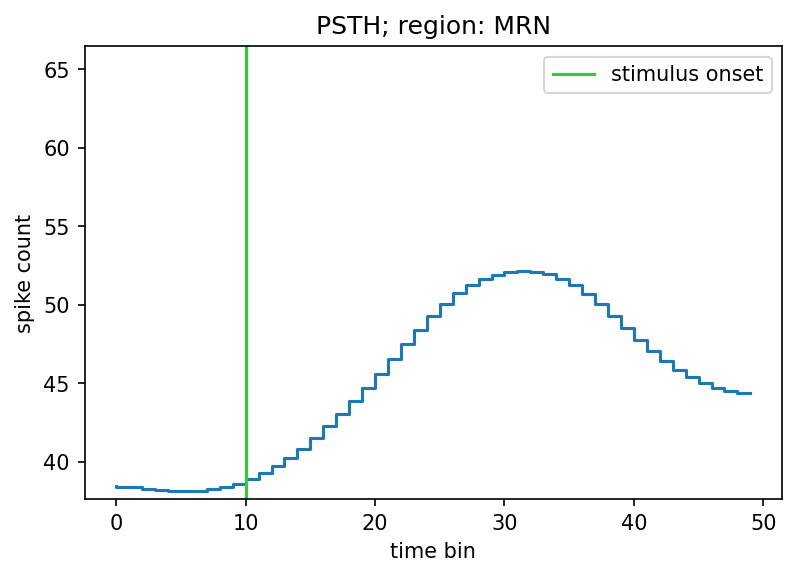

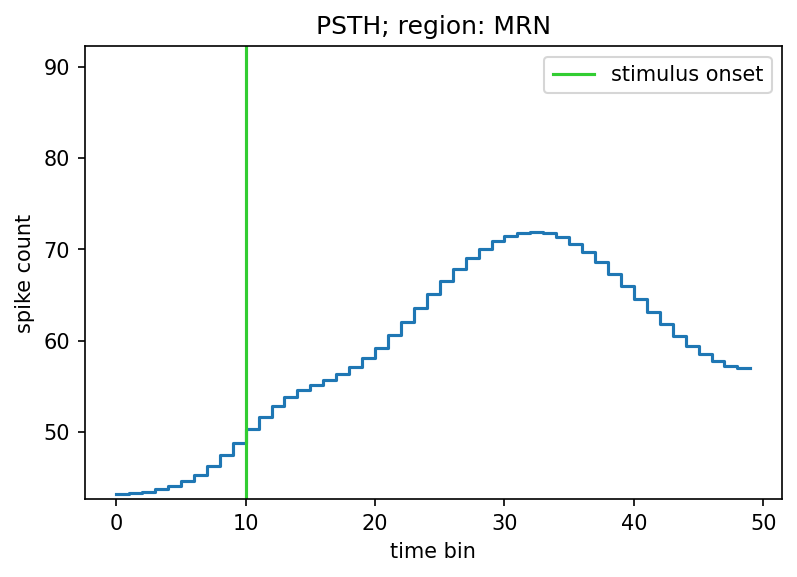

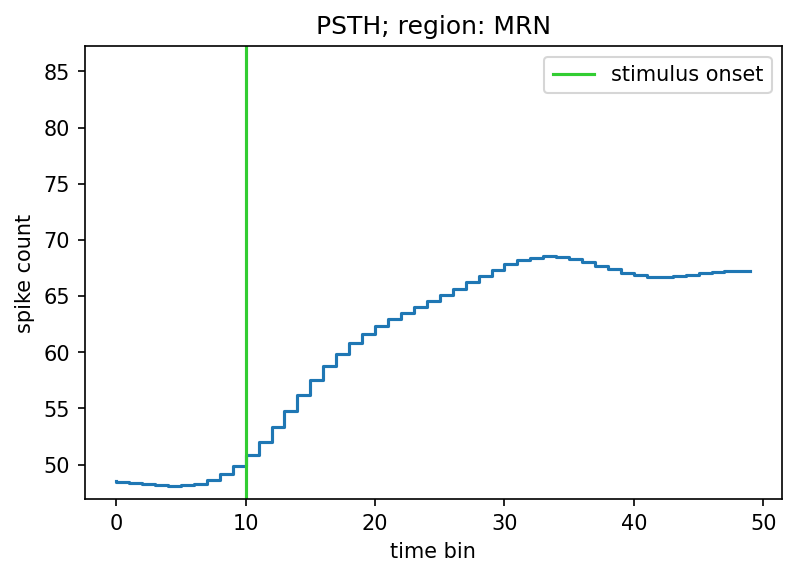

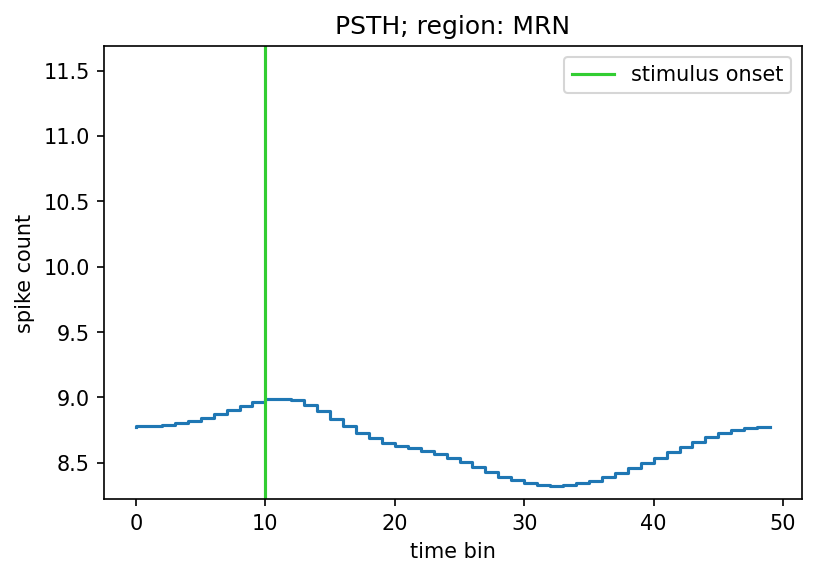

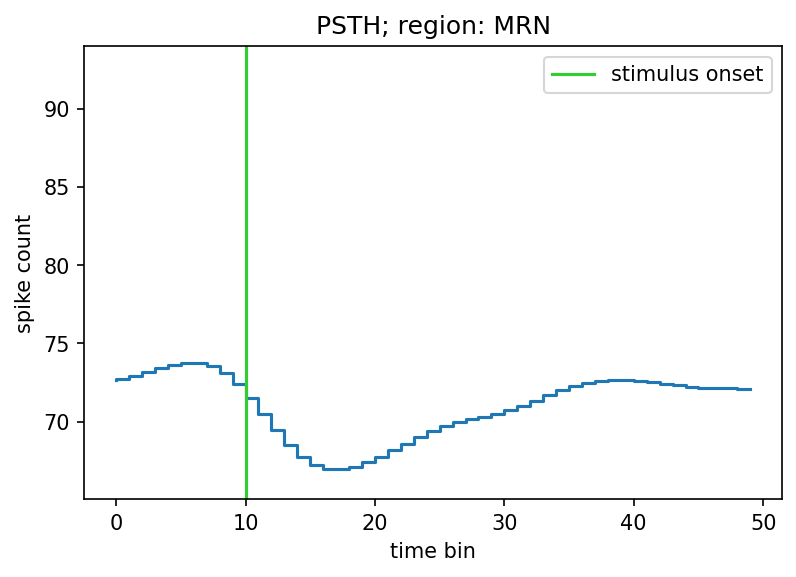

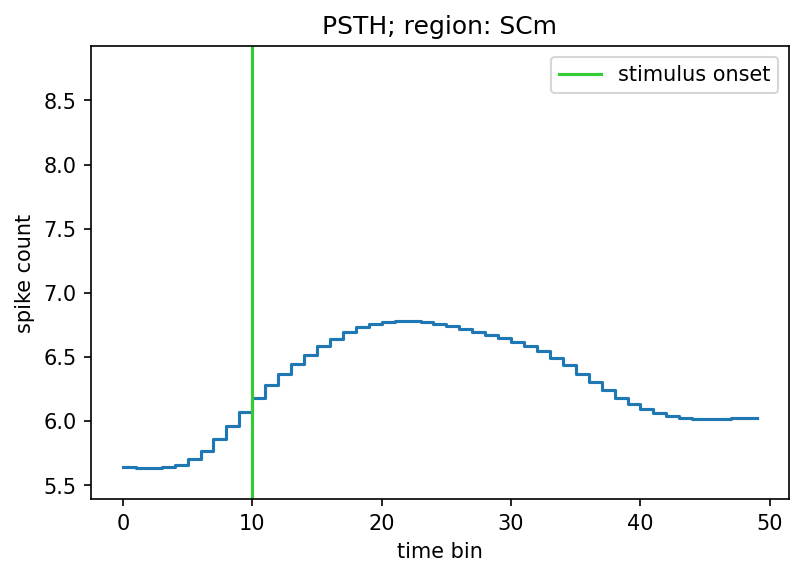

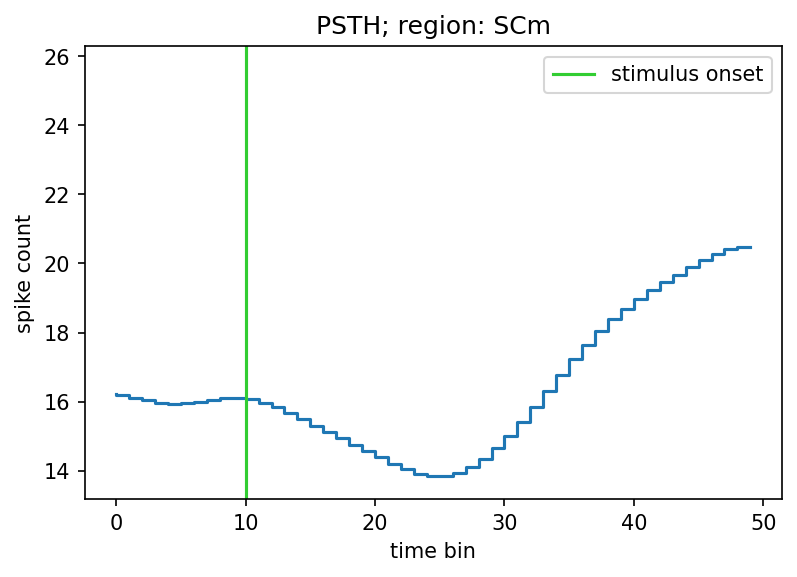

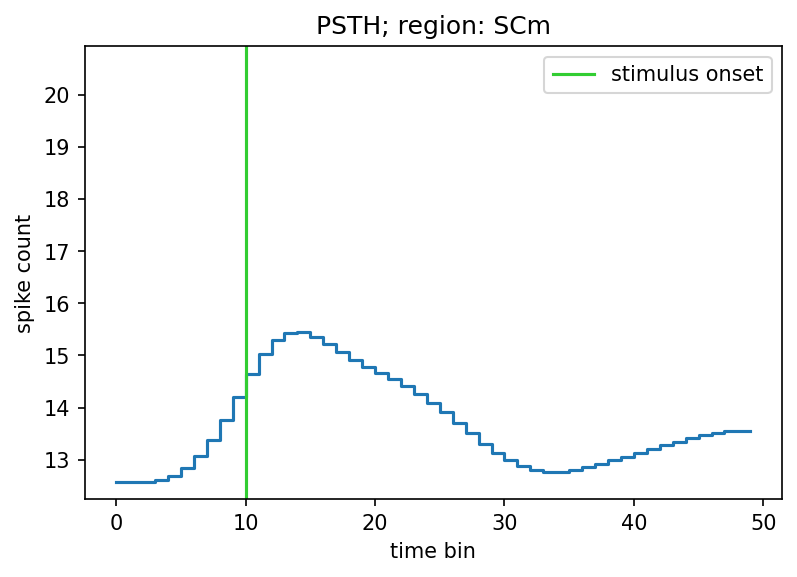

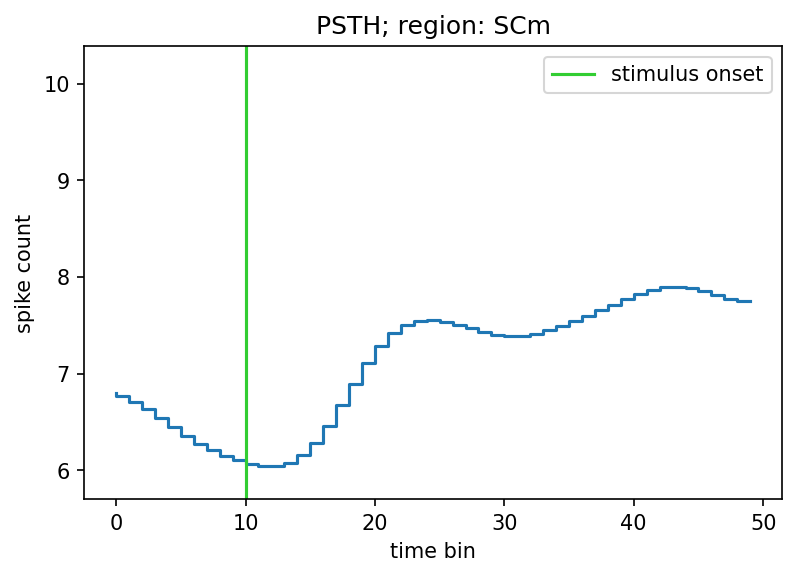

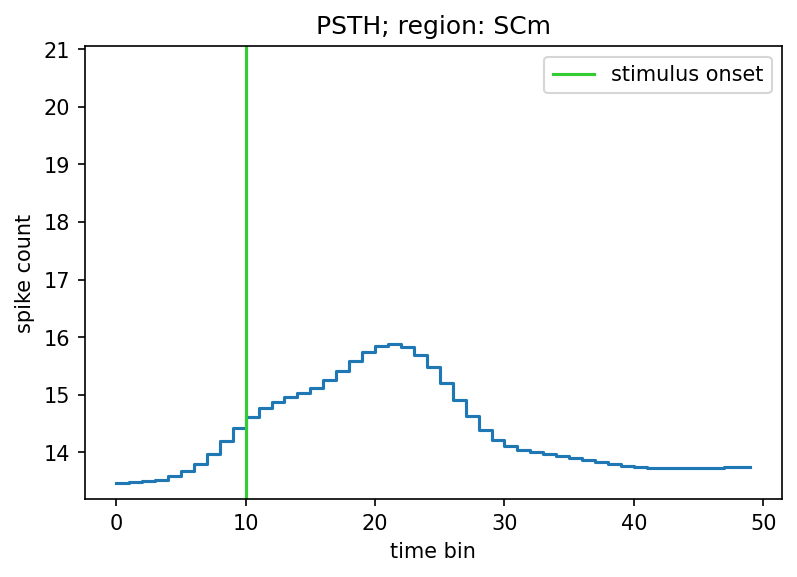

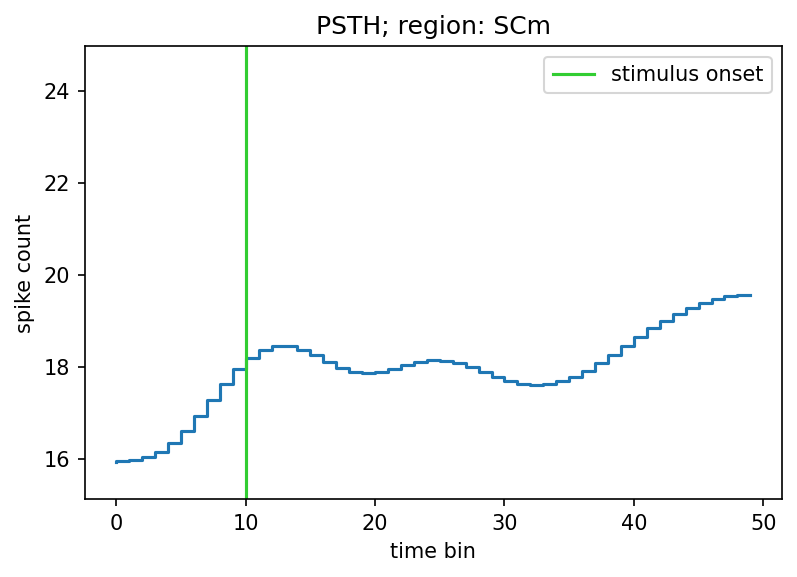

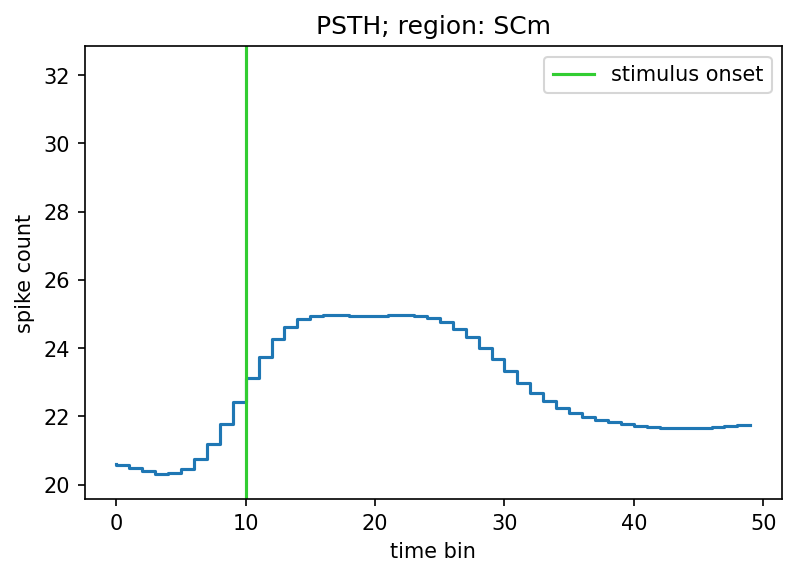

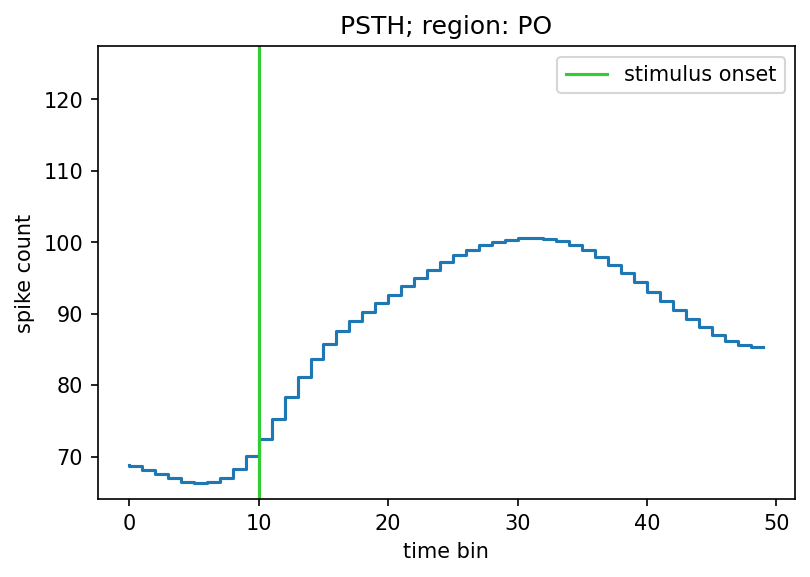

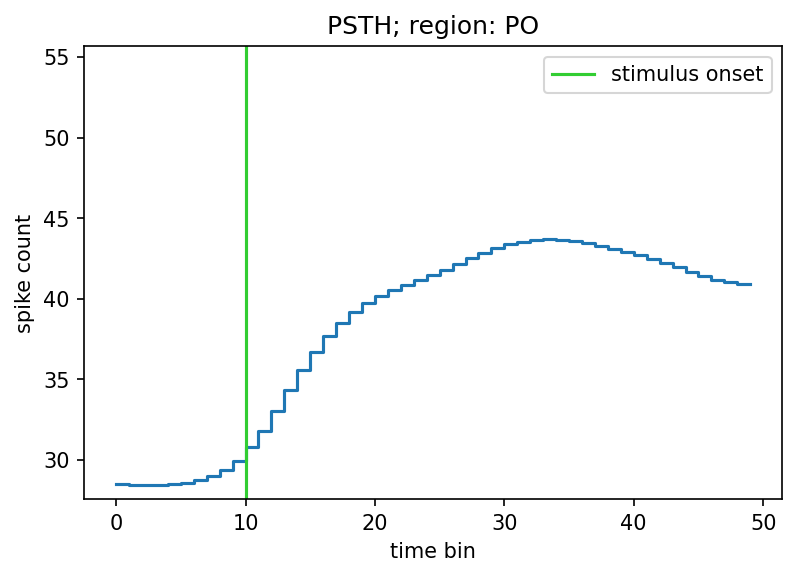

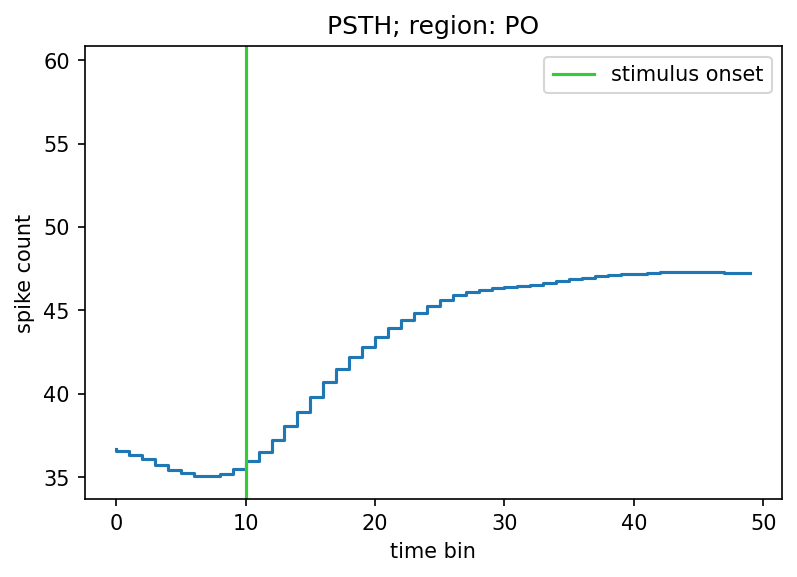

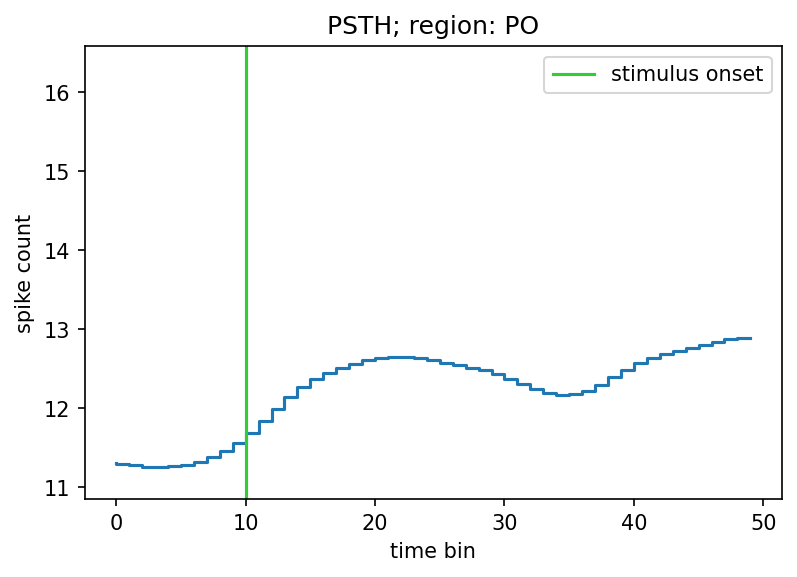

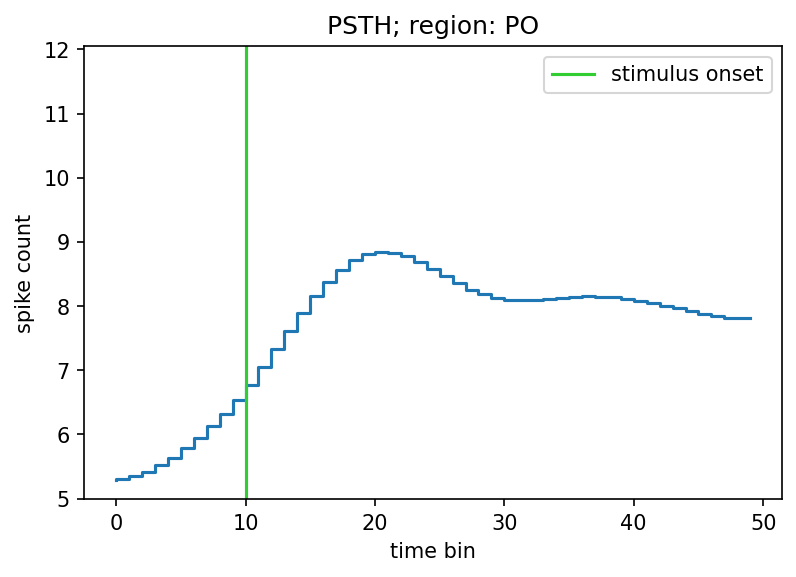

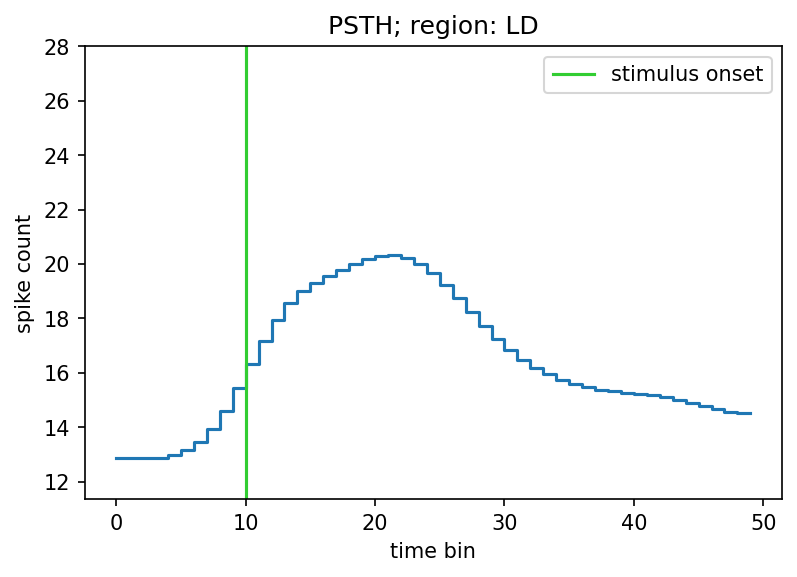

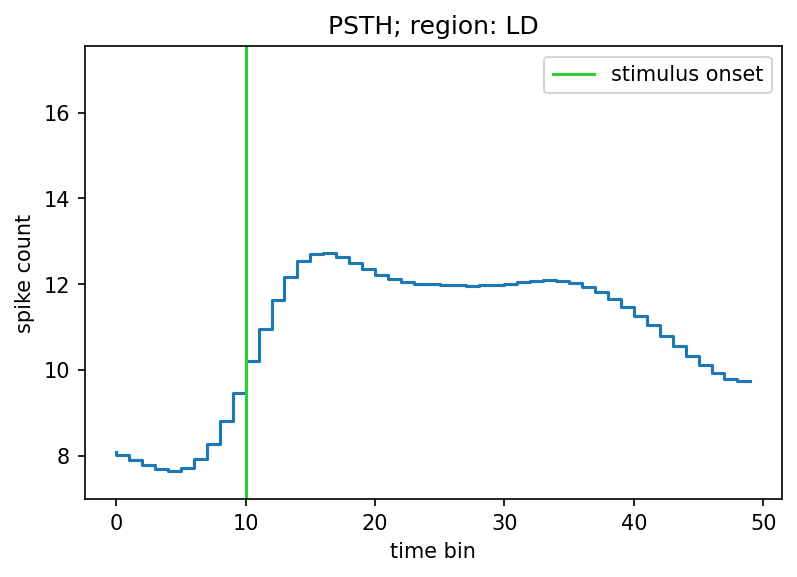

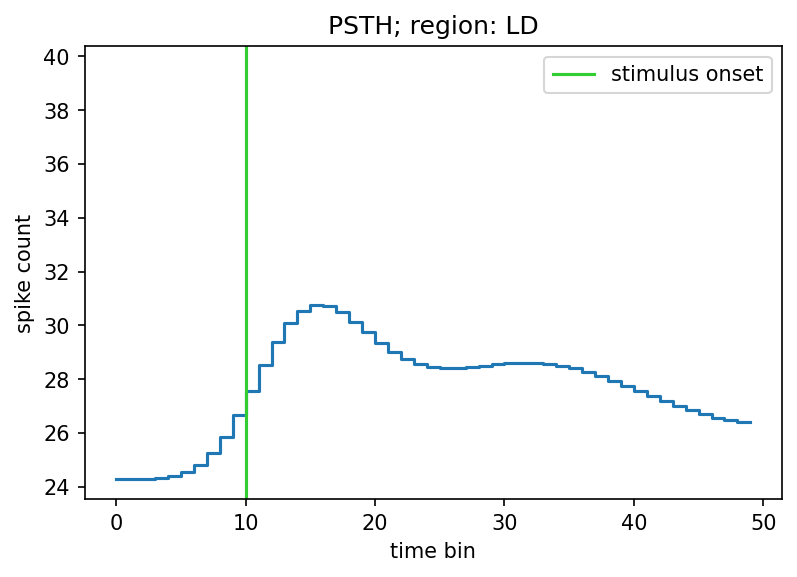

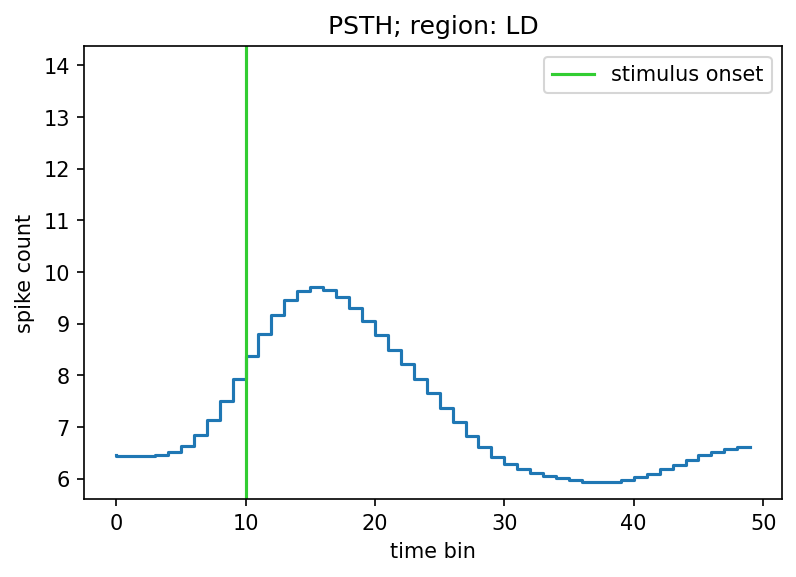

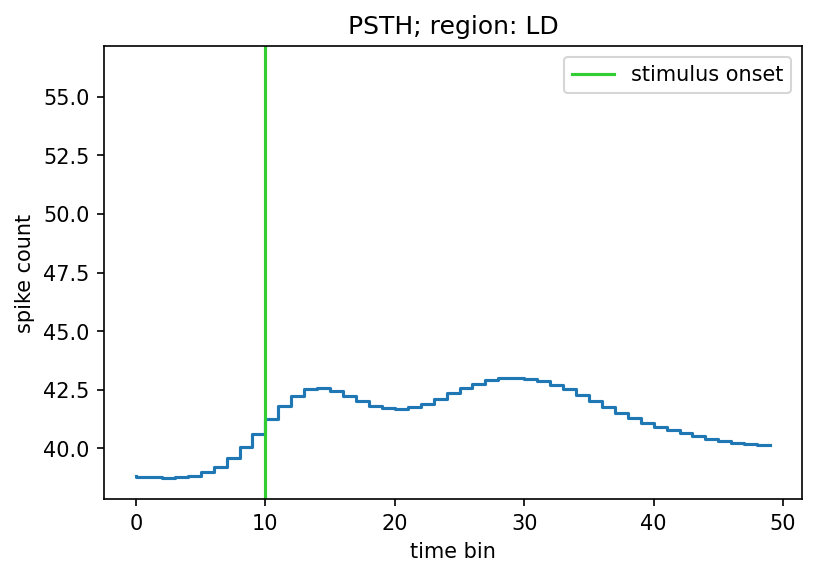

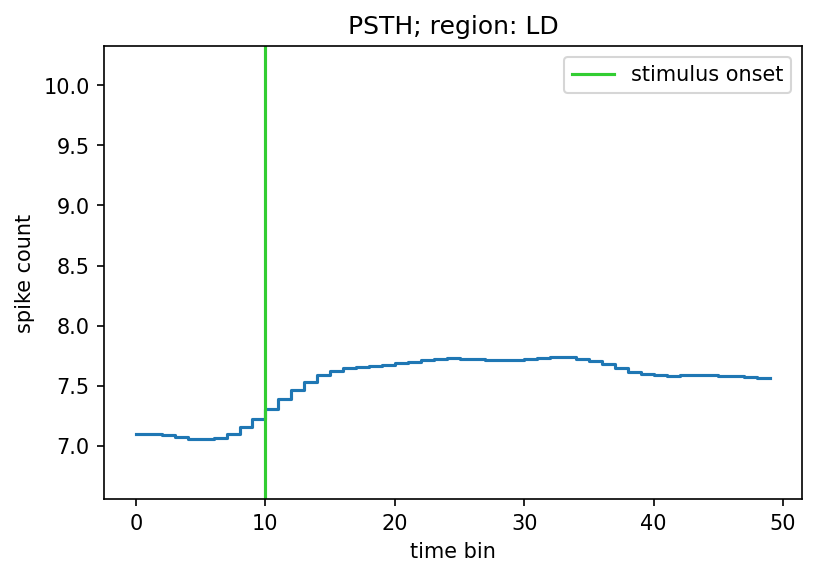

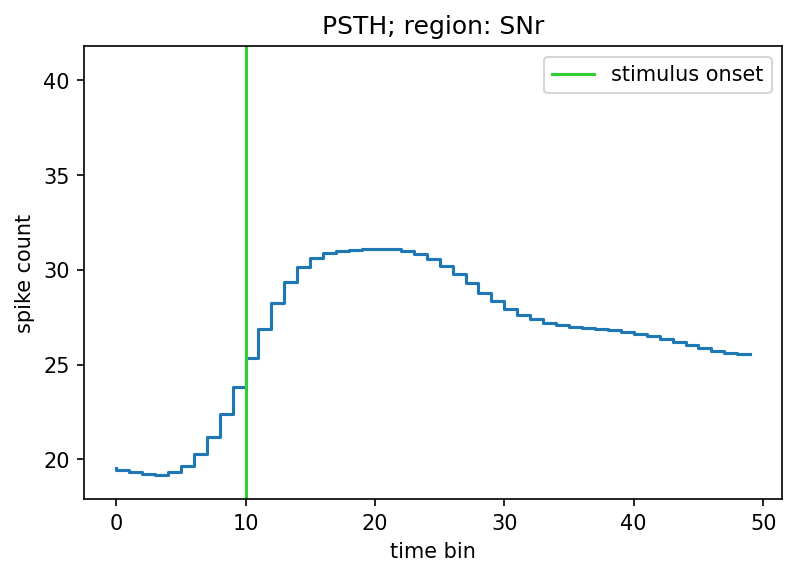

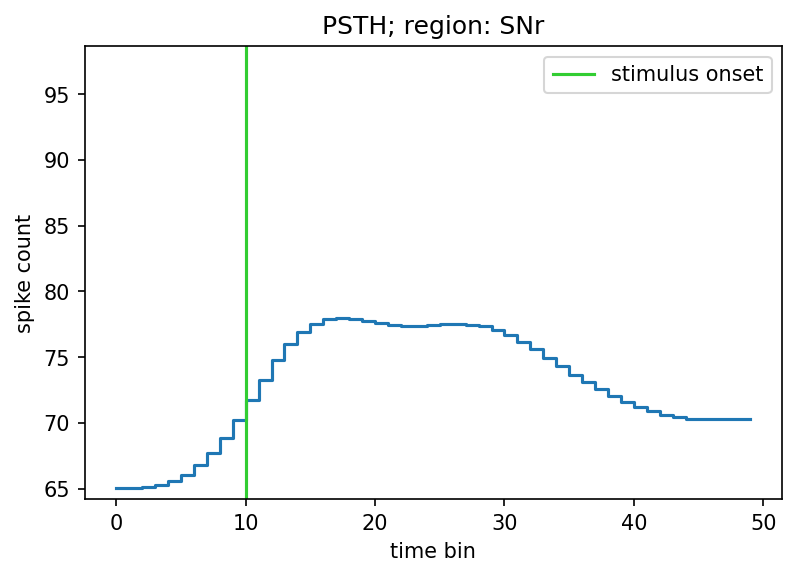

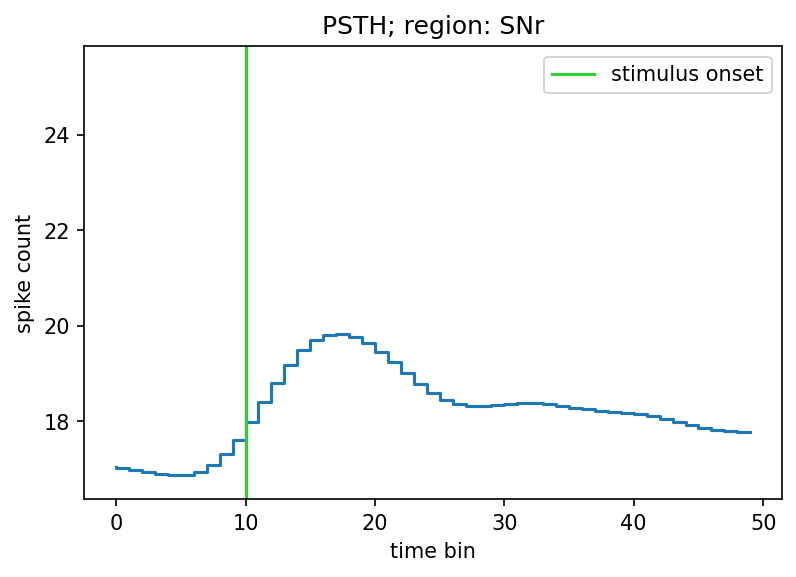

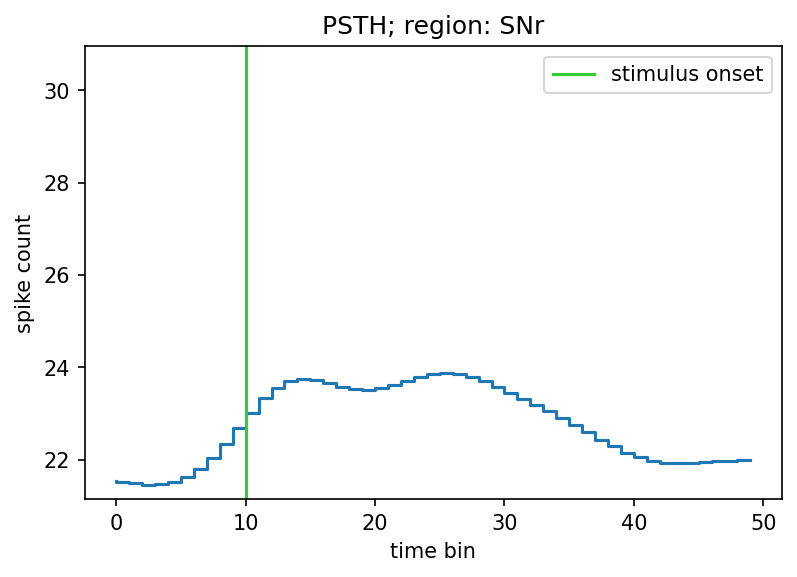

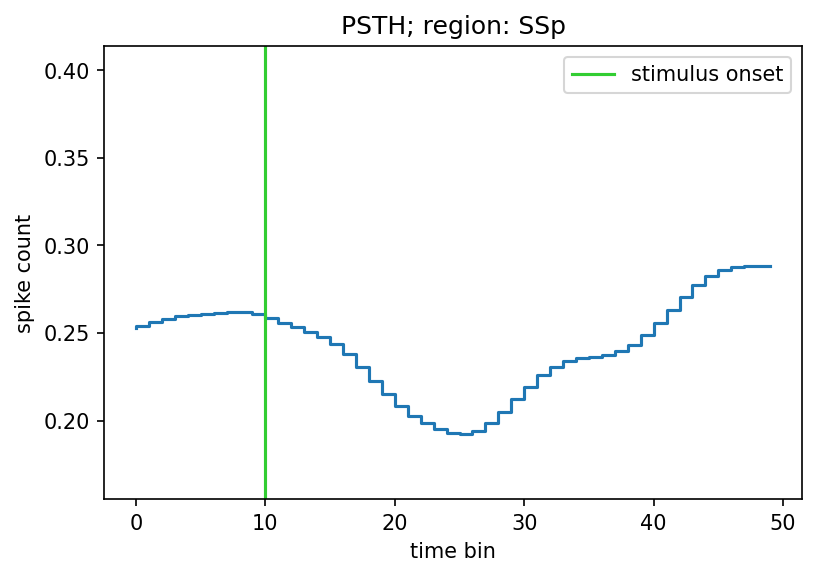

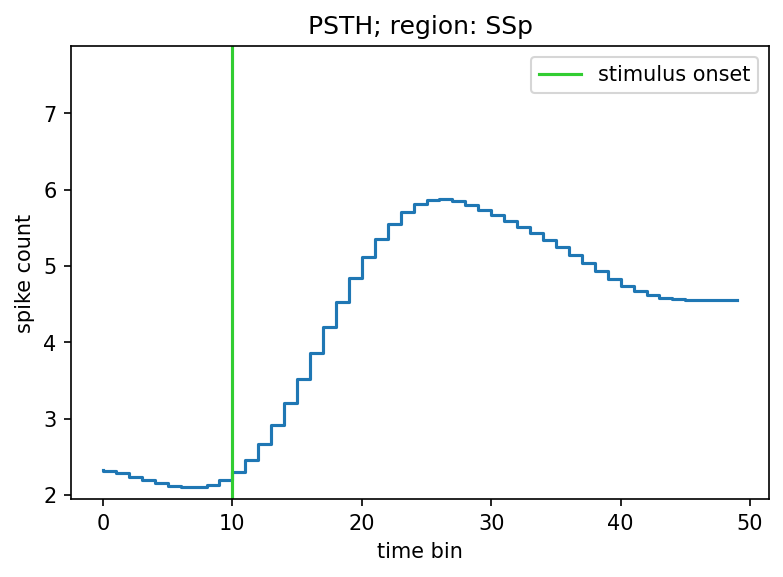

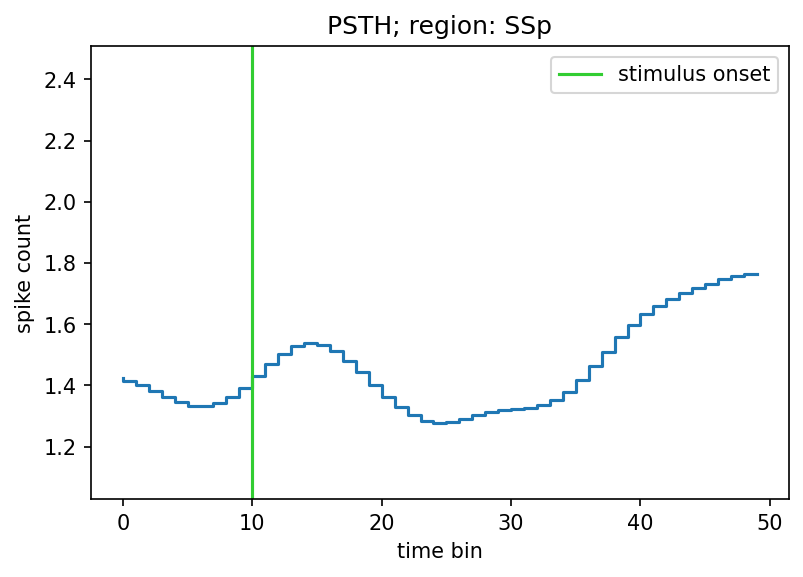

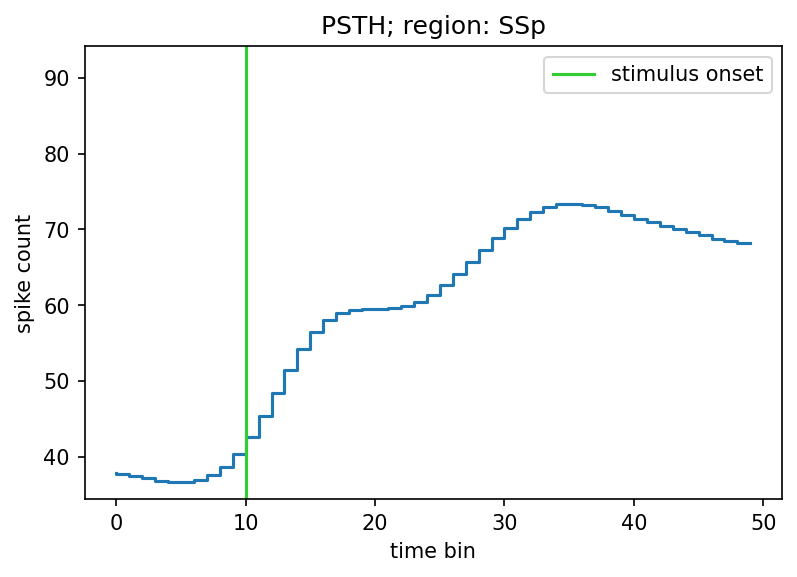

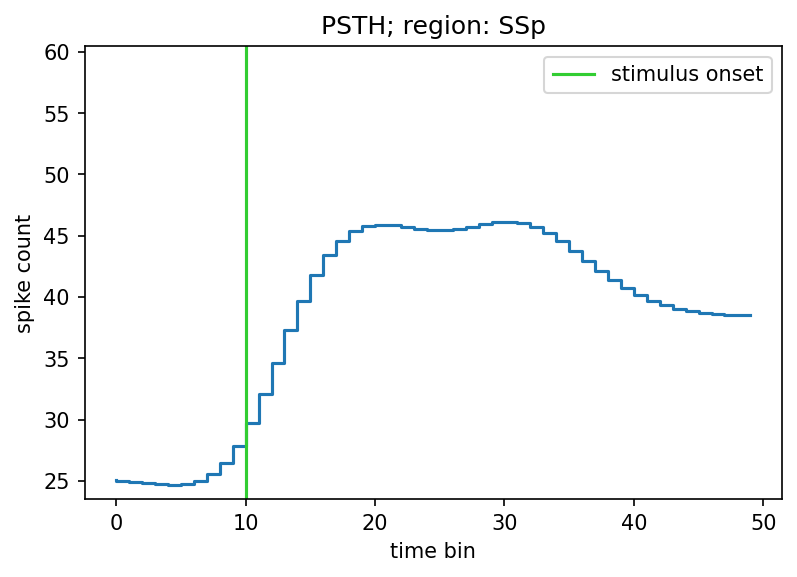

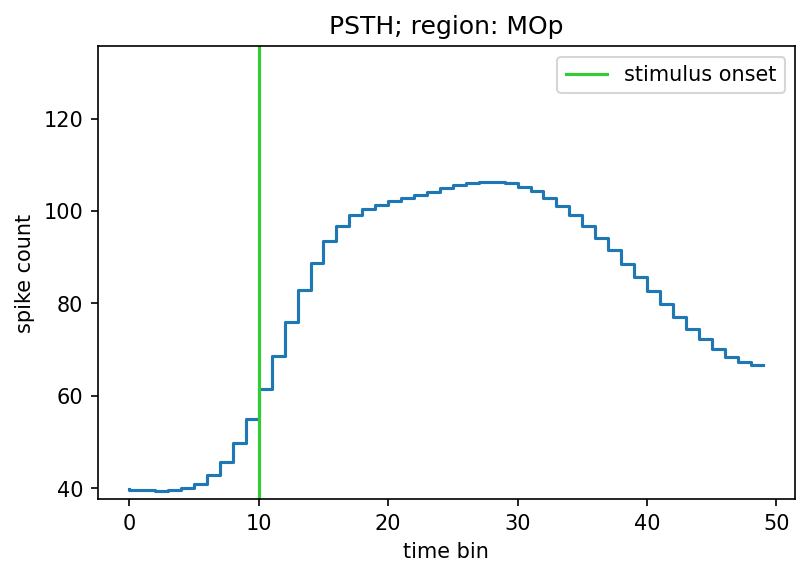

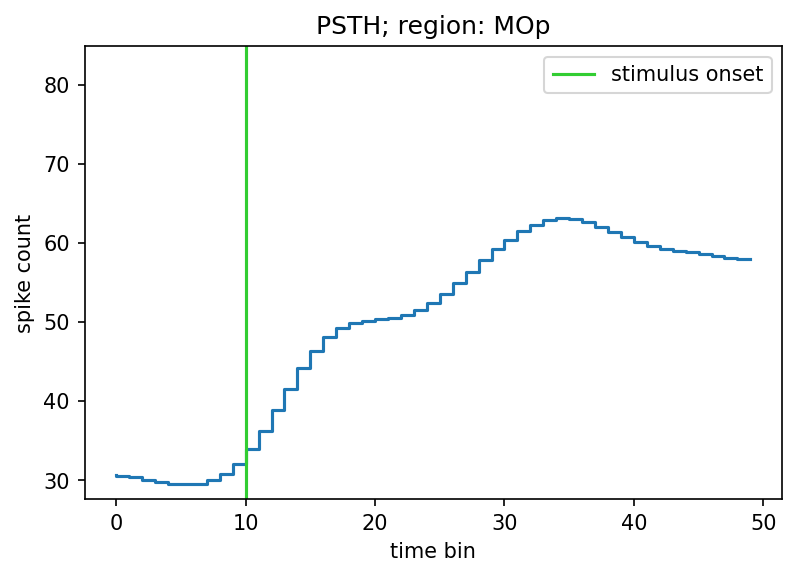

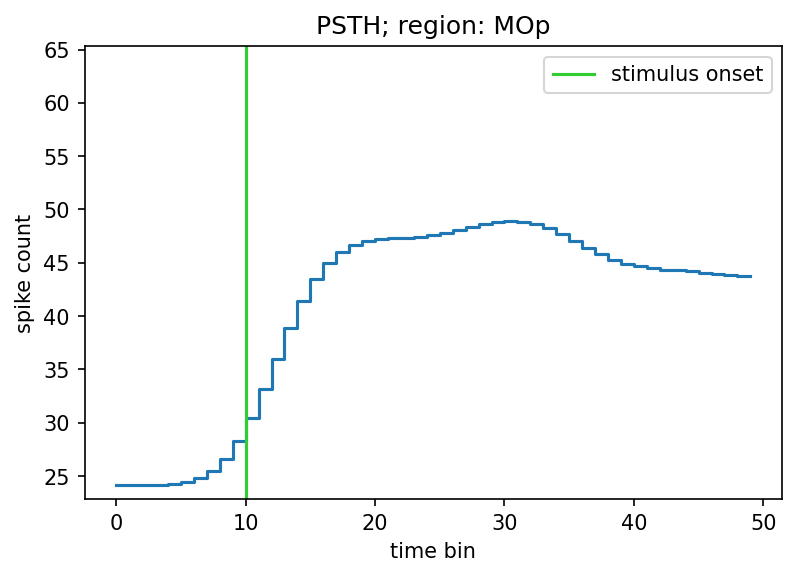

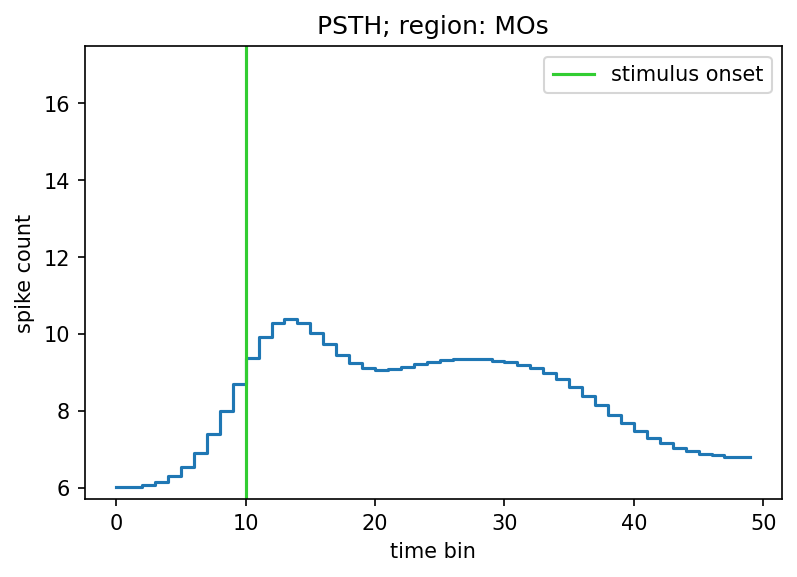

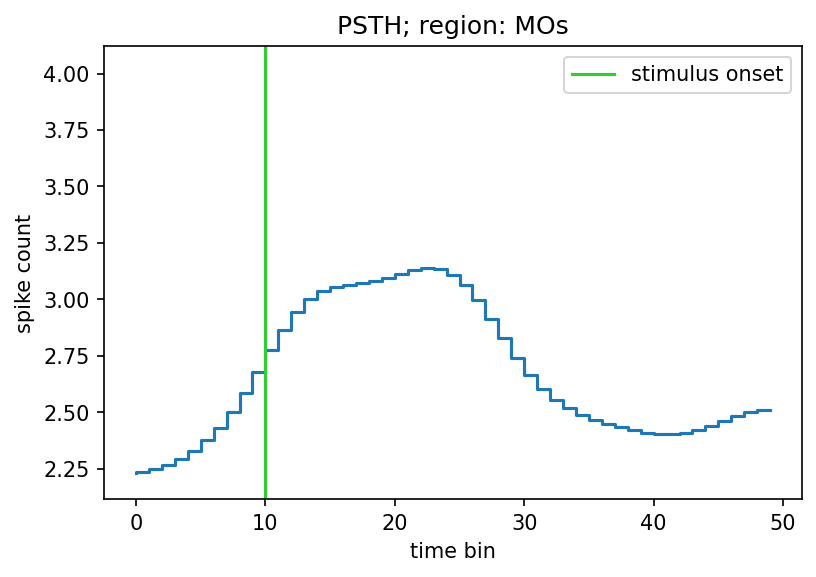

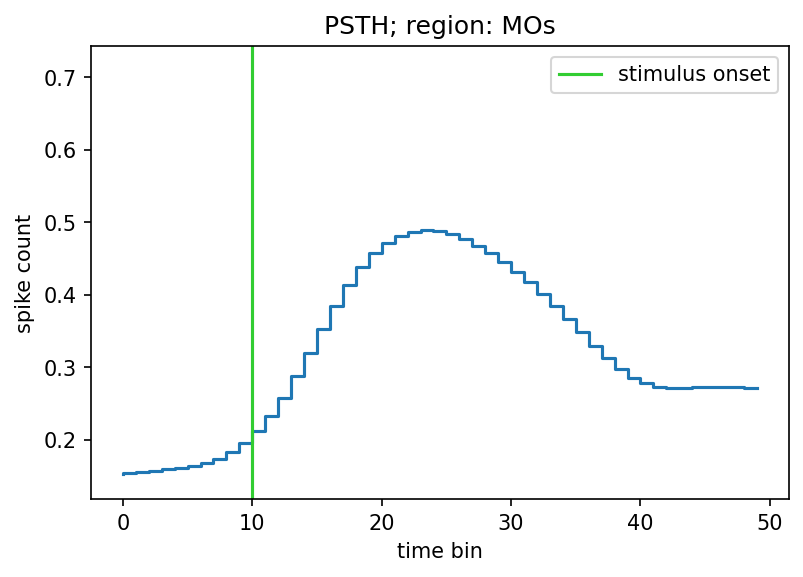

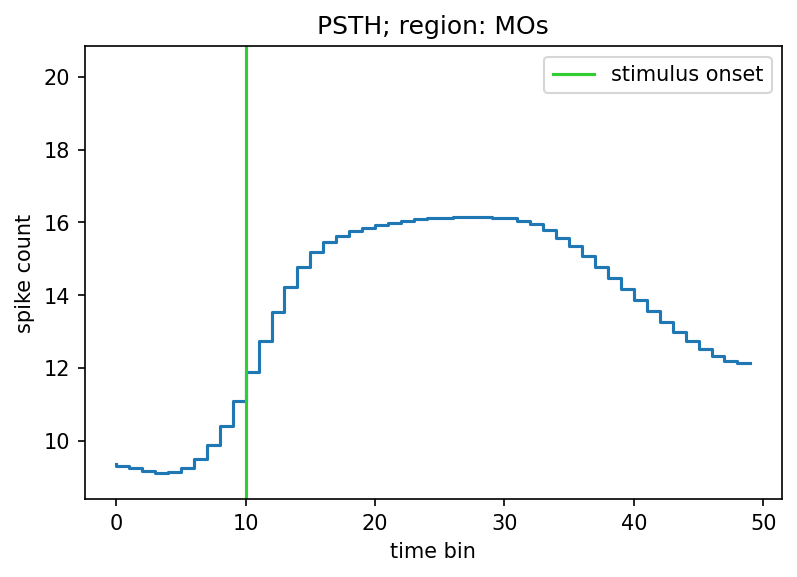

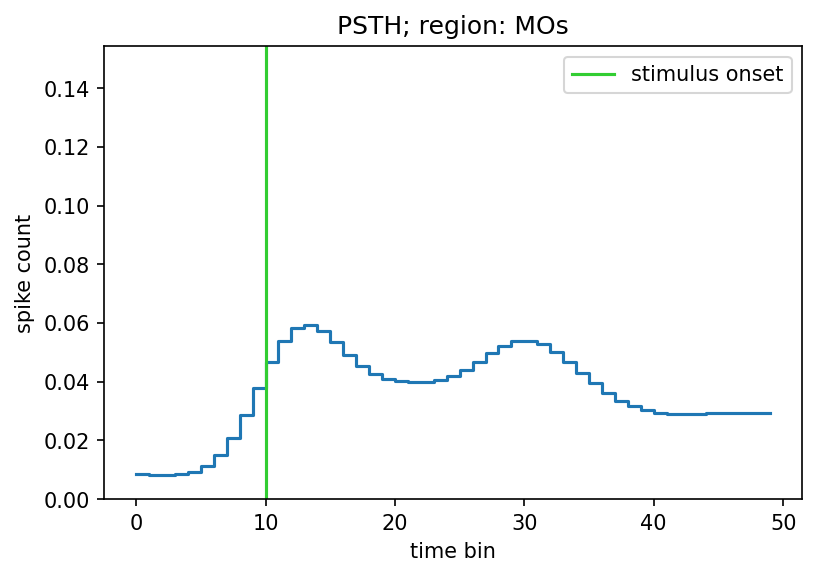

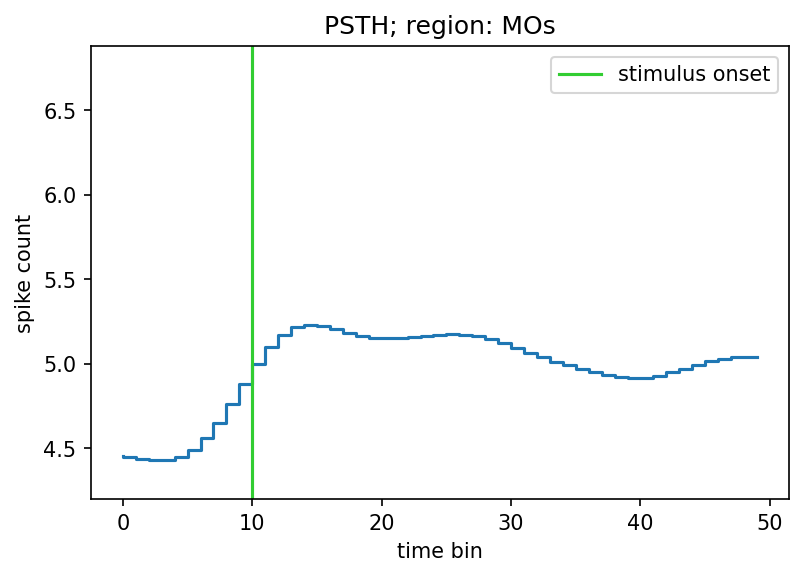

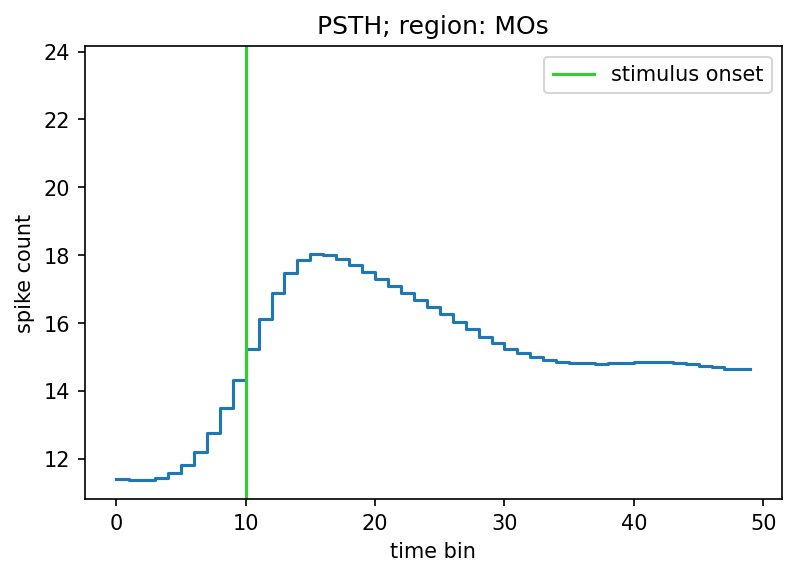

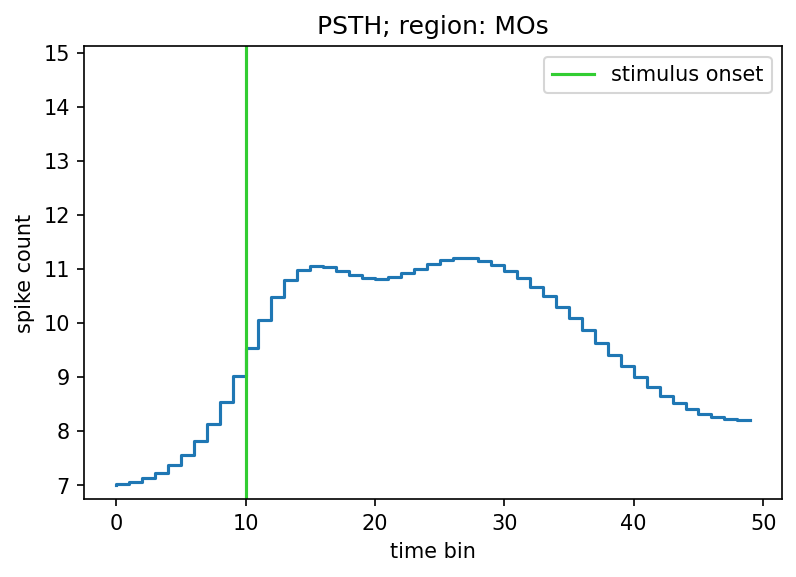

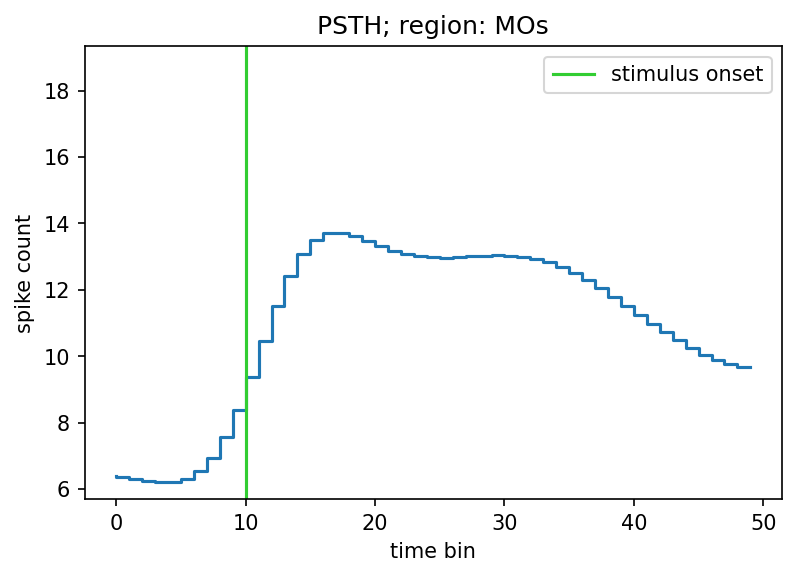

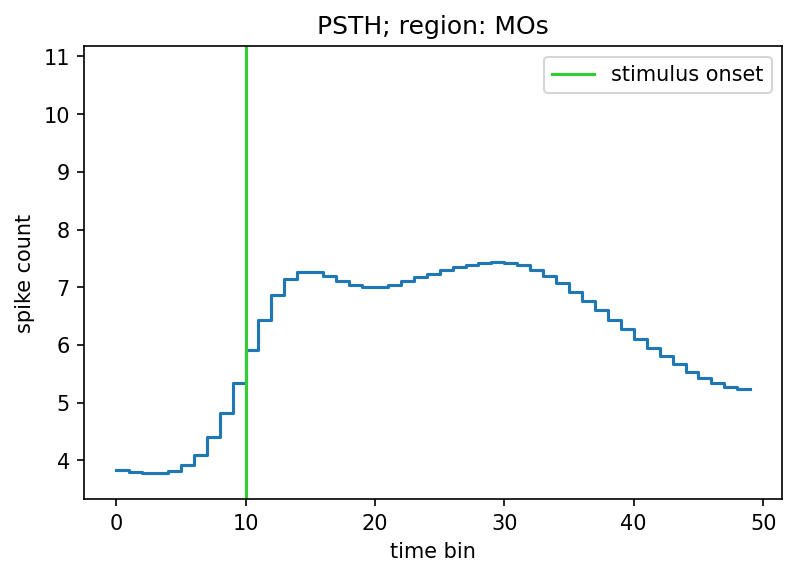

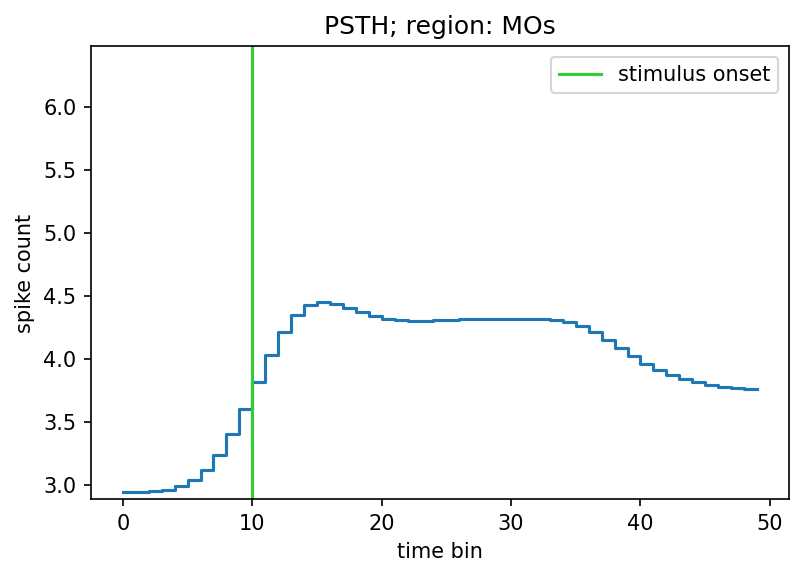

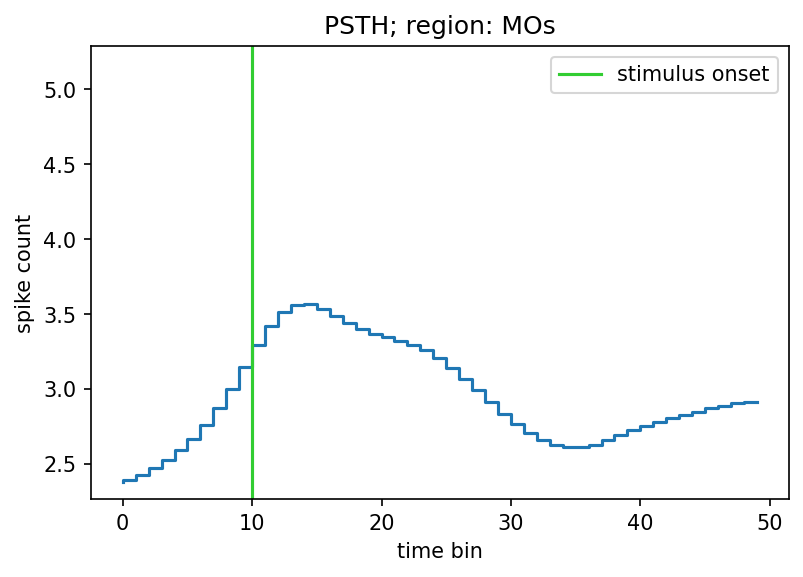

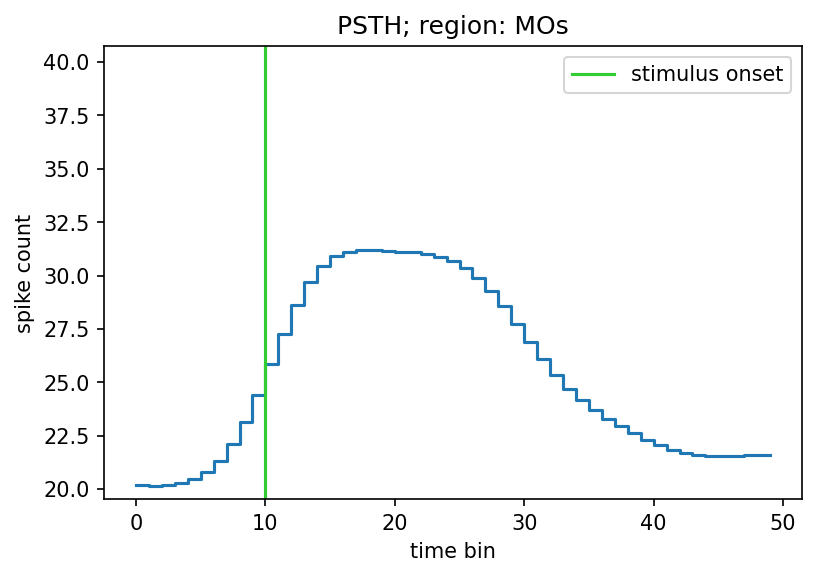

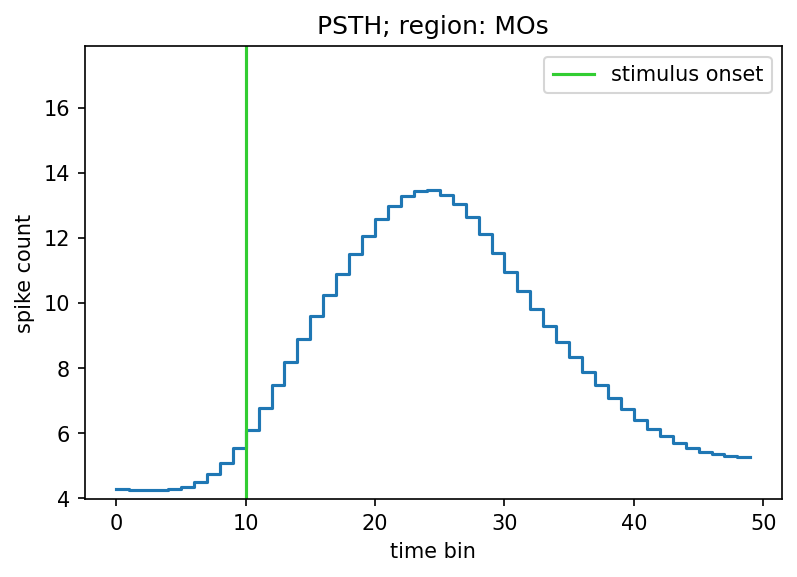

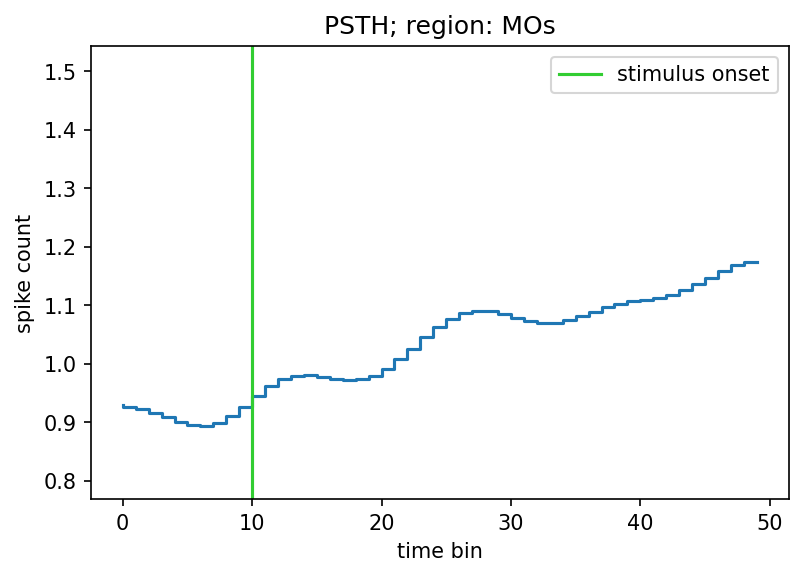

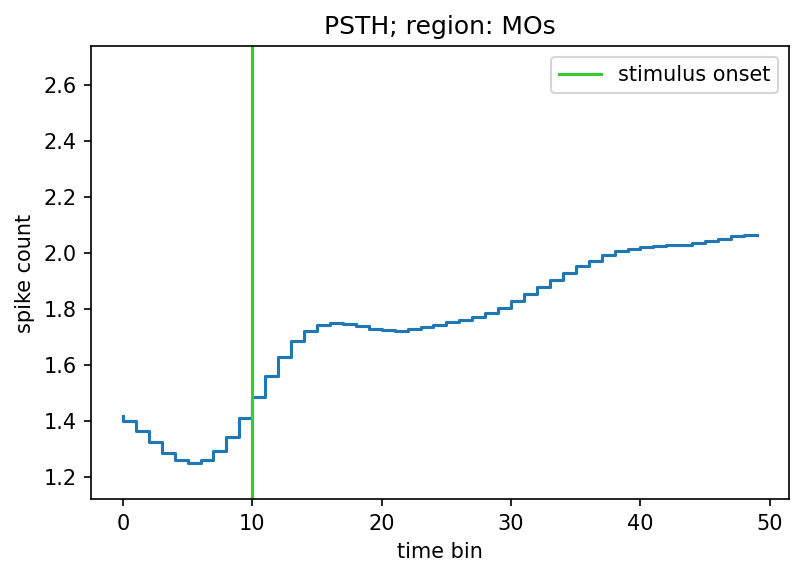

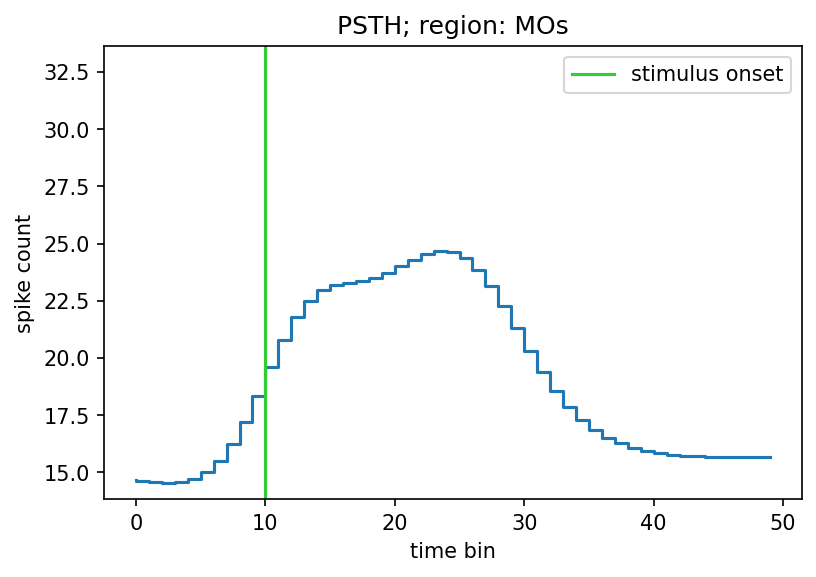

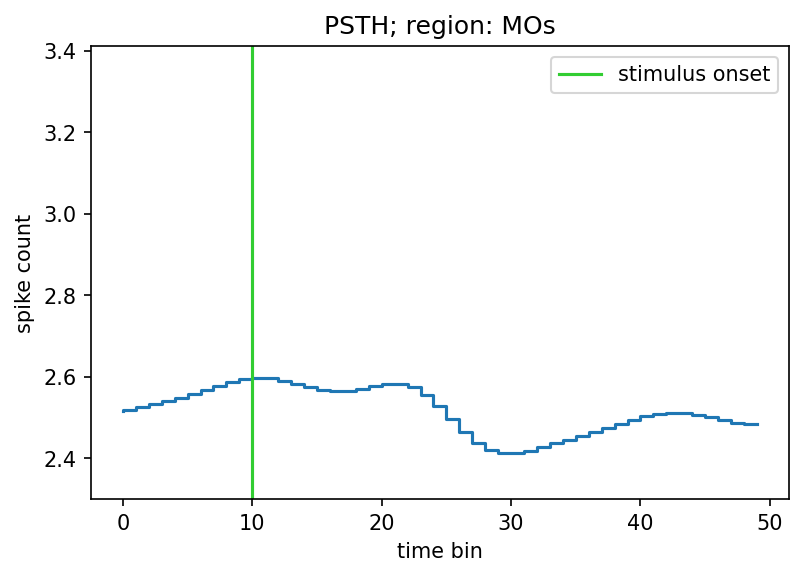

In [7]:
for region in cr_top10:
    for dat in alldat:
        neurons = dat['brain_area'] == region
        neurons_spks = dat['spks'][neurons]
        neurons_count = neurons_spks.shape[0]
        total_neurons_count = dat['spks'].shape[0]
        trials_count = dat['spks'].shape[1]
        if neurons_count > 1:
#             plot_average_activity_neurons_all_trials(neurons_spks, region, sigma=2)
            psth(neurons_spks, region, timebin_size=5)

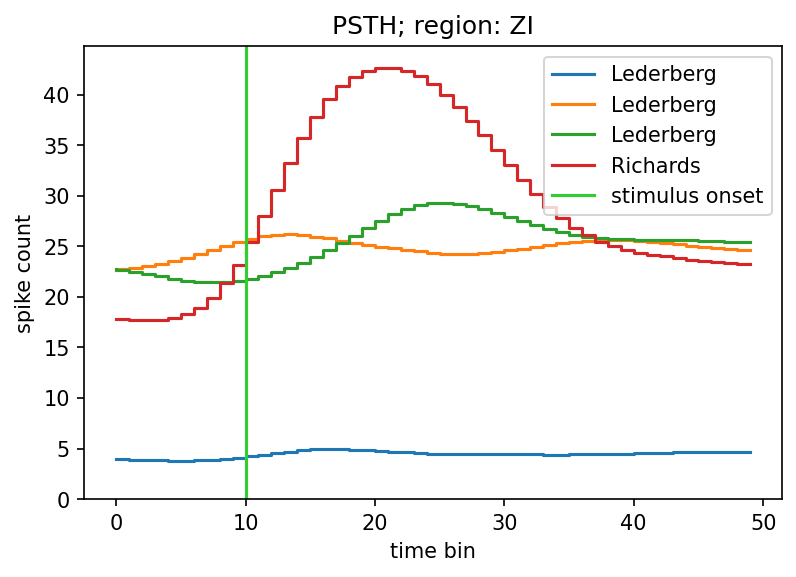

In [13]:
region = "ZI"
psth_combined(alldat, region, timebin_size=5)